<div style="border-radius:10px; padding: 15px;font-family:Brush Script; background-color:DarkSeaGreen; font-size:150%; text-align:center">

<h1 align="center"><font color=white>Unsupervised learning project(On country data) </font></h1>


<div style="border-radius:10px; padding: 15px; background-color: DarkSeaGreen;font-family:Brush Script; font-size:130%; text-align:left">

<h1 align="left"><font color=royalblue>📌About Dataset:</font></h1>
    
***Clustering the Countries by using Unsupervised Learning for HELP International***
    
- **Objective:** To categorise the countries using socio-economic and health factors that determine the overall development of the country.
    
- **About organization:** HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities.
    
- **Problem Statement:** HELP International have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. So, CEO has to make decision to choose the countries that are in the direst need of aid. Hence, my Job as a Data scientist is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then I need to suggest the countries which the CEO needs to focus on the most.

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/unsupervised-learning-on-country-data/Country-data.csv
/kaggle/input/unsupervised-learning-on-country-data/data-dictionary.csv


<a id="4"></a>
# <p style="padding:10px;background-color:SandyBrown ;margin:0;color:Indigo;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 20px 20px;overflowGoldenRod:hidden;font-weight:500">Step 1: Import Python Libraries </p>

In [ ]:
# !pip install pandas_profiling
# !pip install ydata_profiling
# !pip install missingno
# %pip install --user kneed
# %pip install --user plotly
# !conda install -c plotly plotly
# !pip install ipywidgets
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")

%matplotlib inline
import numpy as np
import missingno as msno
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ydata_profiling
import plotly.express as px
import plotly.graph_objects as go

from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from ydata_profiling import ProfileReport
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score as sil_score


<a id="4"></a>
# <p style="padding:10px;background-color:SandyBrown ;margin:0;color:Indigo;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 20px 20px;overflow:hidden;font-weight:500">Step 2: Reading dataset </p>

In [ ]:
# Load dataset and make DataFrame
df = pd.DataFrame(pd.read_csv('/kaggle/input/unsupervised-learning-on-country-data/Country-data.csv'))
df

country  child_mort  exports  health  imports  income  \
0            Afghanistan        90.2     10.0    7.58     44.9    1610   
1                Albania        16.6     28.0    6.55     48.6    9930   
2                Algeria        27.3     38.4    4.17     31.4   12900   
3                 Angola       119.0     62.3    2.85     42.9    5900   
4    Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   
..                   ...         ...      ...     ...      ...     ...   
162              Vanuatu        29.2     46.6    5.25     52.7    2950   
163            Venezuela        17.1     28.5    4.91     17.6   16500   
164              Vietnam        23.3     72.0    6.84     80.2    4490   
165                Yemen        56.3     30.0    5.18     34.4    4480   
166               Zambia        83.1     37.0    5.89     30.9    3280   

     inflation  life_expec  total_fer   gdpp  
0         9.44        56.2       5.82    553  
1         4.49        76.3       1.65   4090  
2        16.10        76.5       2.89   4460  
3        22.40        60.1       6.16   3530  
4         1.44        76.8       2.13  12200  
..         ...         ...        ...    ...  
162       2.62        63.0       3.50   2970  
163      45.90        75.4       2.47  13500  
164      12.10        73.1       1.95   1310  
165      23.60        67.5       4.67   1310  
166      14.00        52.0       5.40   1460  

[167 rows x 10 columns]

# 💡 Pandas profiling:
***

<div style="color:white;
           display:fill;
           border-radius:100px;
           background-color:#d9ecd0;
           font-size:100%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 30px;
              color:DarkSlateGray;">Pandas profiling is an open source Python module with which we can quickly do an exploratory data analysis with just a few lines of code. In short, what pandas profiling does is save us all the work of visualizing and understanding the distribution of each variable. It generates a report with all the information easily available
</p>
</div>


In [ ]:
# Pandas profiling
report = ProfileReport(df)
report

In [ ]:
#  Display the top 5 observations of the dataset
df.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

In [ ]:
# Display the last 5 observations of the dataset
df.tail()

country  child_mort  exports  health  imports  income  inflation  \
162    Vanuatu        29.2     46.6    5.25     52.7    2950       2.62   
163  Venezuela        17.1     28.5    4.91     17.6   16500      45.90   
164    Vietnam        23.3     72.0    6.84     80.2    4490      12.10   
165      Yemen        56.3     30.0    5.18     34.4    4480      23.60   
166     Zambia        83.1     37.0    5.89     30.9    3280      14.00   

     life_expec  total_fer   gdpp  
162        63.0       3.50   2970  
163        75.4       2.47  13500  
164        73.1       1.95   1310  
165        67.5       4.67   1310  
166        52.0       5.40   1460

# 💡About features:
****

| <p style="text-align: center;color:LightCoral;font-size:130%;">Name</p> |<p style="text-align: center;color:LightCoral;font-size:130%;">Describtion</p>  |
|------|------|
|**child mort**|<p style="text-align: center;"> Death of children under 5 years of age per 1000 live birth.</p> |
|**country** |<p style="text-align: center;">Name of the country.</p>  |
|**exports**|<p style="text-align: center;">Exports of goods and services per capita. Given as %age of the GDP per capita</p> |
|**health**|<p style="text-align: center;">Total health spending per capita. Given as %age of GDP per capita.</p> |
|**imports**|<p style="text-align: center;">Imports of goods and services per capita. Given as %age of the GDP per capita.</p> |
|**income**|<p style="text-align: center;">Net income per person.</p>|
|**inflation**|<p style="text-align: center;">The measurement of the annual growth rate of the Total GDP.</p> |
|**life_expec**|<p style="text-align: center;">The average number of years a new born child would live if the current mortality patterns are to remain the same.</p> |
|**total_fer**|<p style="text-align: center;">The number of children that would be born to each woman if the current age-fertility rates remain the same.</p> |
|**gdpp**|<p style="text-align: center;">The GDP per capita. Calculated as the Total GDP divided by the total population.</p> |

****

In [ ]:
# Get the number of rows(samples)
n_rows = df.shape[0]

# Get the number of columns(featuers)
n_cols = df.shape[1]

# Print the number of rows and columns
print("The number of rows is: ", n_rows)
print("The number of columns is: ", n_cols)

The number of rows is:  167
The number of columns is:  10


In [ ]:
# Get information from dataframe
# info() helps to understand the data type and information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [ ]:
# Checking some information of data
def check_data(df):
    List = []
    columns = df.columns
    for cols in columns:
        null_val = df[cols].isnull().sum()  # Checking the null values
        unique_val = df[cols].nunique()  # Checking the unique values
        dtypes = df[cols].dtypes  # Cheking the type of features
        List.append([cols, null_val, unique_val, dtypes])
    df_check = pd.DataFrame(List)
    df_check.columns = ["columns", "null_val", "unique_val", "dtypes"]
    return df_check


check_data(df)

columns  null_val  unique_val   dtypes
0     country         0         167   object
1  child_mort         0         139  float64
2     exports         0         147  float64
3      health         0         147  float64
4     imports         0         151  float64
5      income         0         156    int64
6   inflation         0         156  float64
7  life_expec         0         127  float64
8   total_fer         0         138  float64
9        gdpp         0         157    int64

<Axes: >

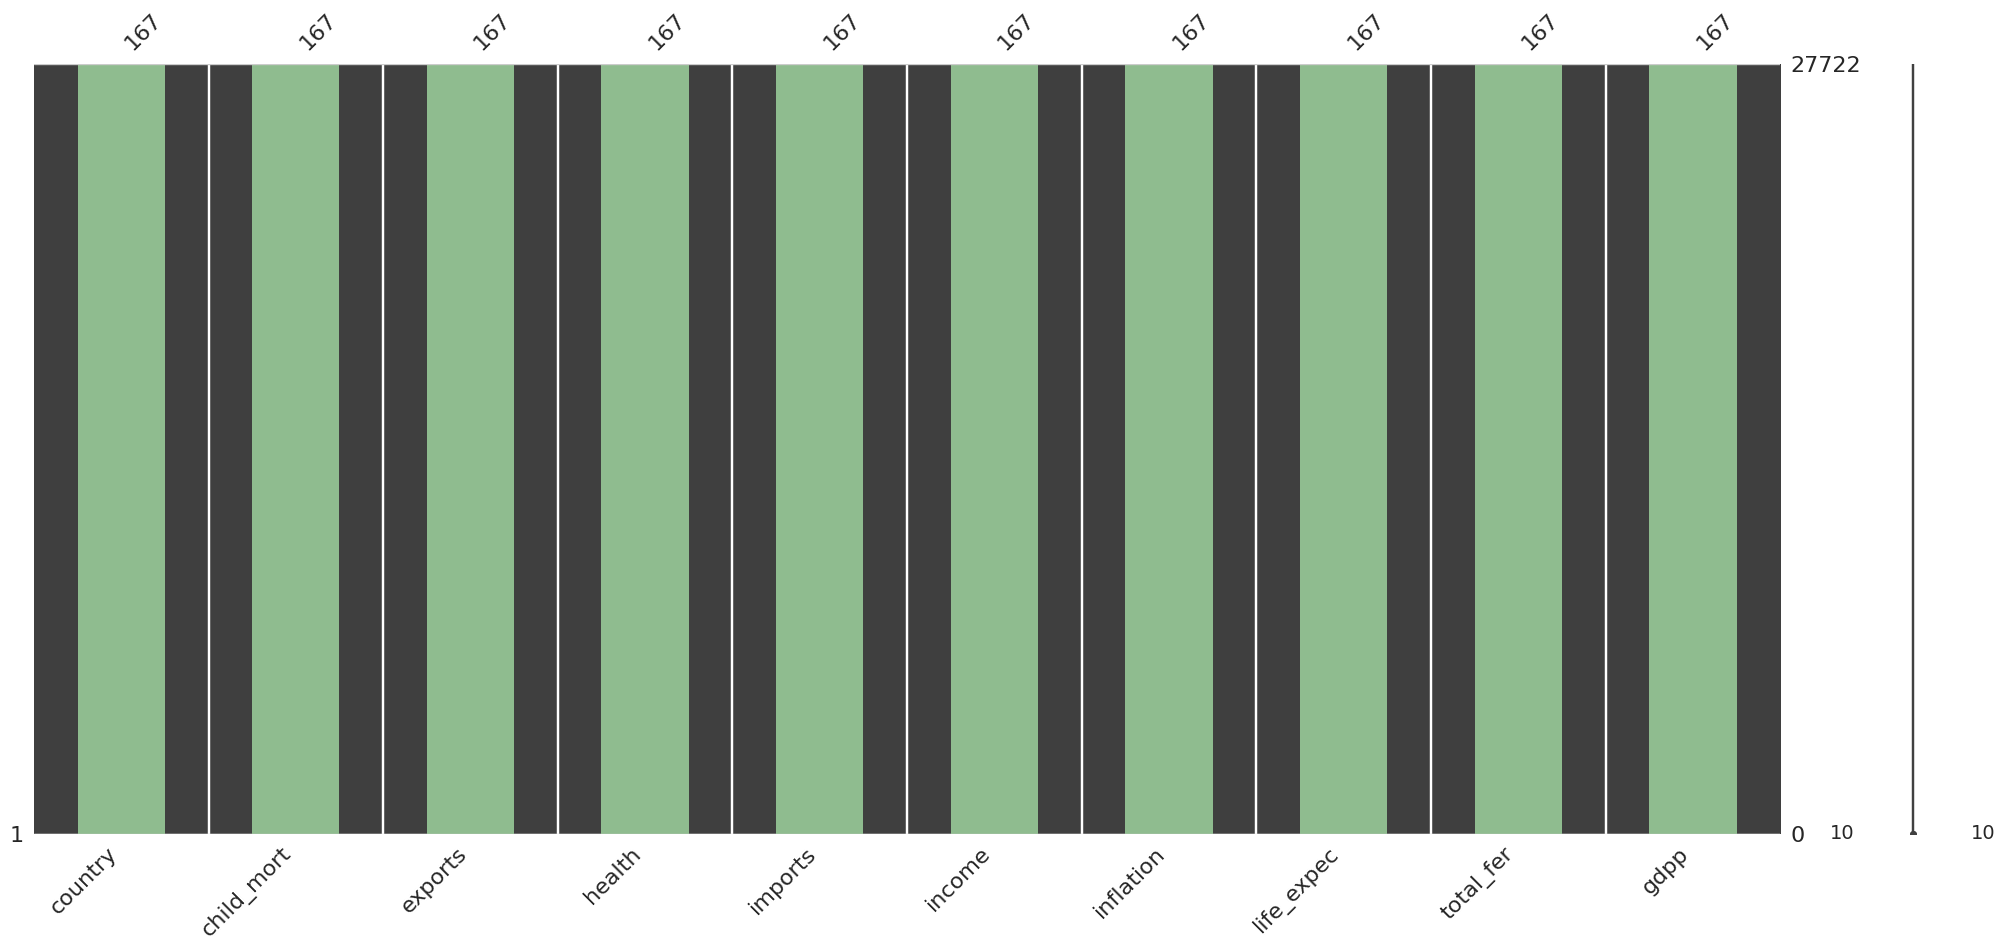

In [ ]:
# Checking the missing value
msno.matrix(df)
msno.bar(df, color="DarkSeaGreen")

***
<div style="border-radius:10px; padding: 15px; background-color:GhostWhite; font-size:85%; text-align:left">

<h1 align="left"><font color=royalblue>🔸Observation: </font></h1>


-  As I can see, we don't have missing value.
    
***

In [ ]:
# Check for Duplication
print("The number of duplicated value in data:\n", df.duplicated().sum())

The number of duplicated value in data:
 0


<a id="4"></a>
# <p style="padding:10px;background-color:SandyBrown ;margin:0;color:Indigo;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 20px 20px;overflowGoldenRod:hidden;font-weight:500">Step 3: Statistics Summary </p>

# 💡Statistics summary:
***


<div style="color:white;
           display:fill;
           border-radius:100px;
           background-color:#d9ecd0;
           font-size:100%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 30px;
              color:DarkSlateGray;">Statistics summary gives a high-level idea to identify whether the data has any outliers, data entry error, distribution of data such as the data is normally distributed or left/right skewed
</p>
</div>

In [ ]:
# Get a summary from dataframe
df.describe().T

count          mean           std       min       25%      50%  \
child_mort  167.0     38.270060     40.328931    2.6000     8.250    19.30   
exports     167.0     41.108976     27.412010    0.1090    23.800    35.00   
health      167.0      6.815689      2.746837    1.8100     4.920     6.32   
imports     167.0     46.890215     24.209589    0.0659    30.200    43.30   
income      167.0  17144.688623  19278.067698  609.0000  3355.000  9960.00   
inflation   167.0      7.781832     10.570704   -4.2100     1.810     5.39   
life_expec  167.0     70.555689      8.893172   32.1000    65.300    73.10   
total_fer   167.0      2.947964      1.513848    1.1500     1.795     2.41   
gdpp        167.0  12964.155689  18328.704809  231.0000  1330.000  4660.00   

                 75%        max  
child_mort     62.10     208.00  
exports        51.35     200.00  
health          8.60      17.90  
imports        58.75     174.00  
income      22800.00  125000.00  
inflation      10.75     104.00  
life_expec     76.80      82.80  
total_fer       3.88       7.49  
gdpp        14050.00  105000.00

In [ ]:
df.describe(include="object").T

count unique          top freq
country   167    167  Afghanistan    1

***
<div style="border-radius:10px; padding: 15px; background-color:GhostWhite ; font-size:85%; text-align:left">

<h1 align="left"><font color=royalblue>🔸Observation: </font></h1>
    
🔸 As we can see we have 167 contries and also data doesn't have missing values.<br>
🔸 It's seems that we have outliers in dataset that we have to checked in continue.<br>
🔸 The minimum of child mort is 8 and the maximum is 208.<br>
🔸 The minimum of exports is about 29 and the maximum is 200.<br>
🔸 The minimum of health is 1.8 and the maximum of health is 17.<br>
🔸 The minimum of life_expec is 32 and the max is 83.<br>
🔸 we have negetive inflation. The minimum of inflation is -4.2 and the maximum is 104.

***

<a id="4"></a>
# <p style="padding:10px;background-color:SandyBrown ;margin:0;color:Indigo;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 20px 20px;overflowGoldenRod:hidden;font-weight:500">Step 4: EDA Bivariate Analysis </p>

# 💡Bivariate Analysis:
***
<div style="color:white;
           display:fill;
           border-radius:100px;
           background-color:#d9ecd0;
           font-size:100%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 30px;
              color:DarkSlateGray;">Bivariate Analysis helps to understand how variables are related to each other and the relationship between dependent and independent variables present in the dataset.
For Numerical variables, Pair plots and Scatter plots are widely been used to do Bivariate Analysis.
</p>
</div>

# 💡Pairplot:
****
<div style="color:white;
           display:fill;
           border-radius:100px;
           background-color:#d9ecd0;
           font-size:100%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 30px;
              color:DarkSlateGray;">Pairplot is a data visualization technique that shows the pairwise relationships between all variables in a dataset. It can be used to identify patterns, trends, and outliers in the data. Pairplots are commonly used in exploratory data analysis (EDA).
</div>


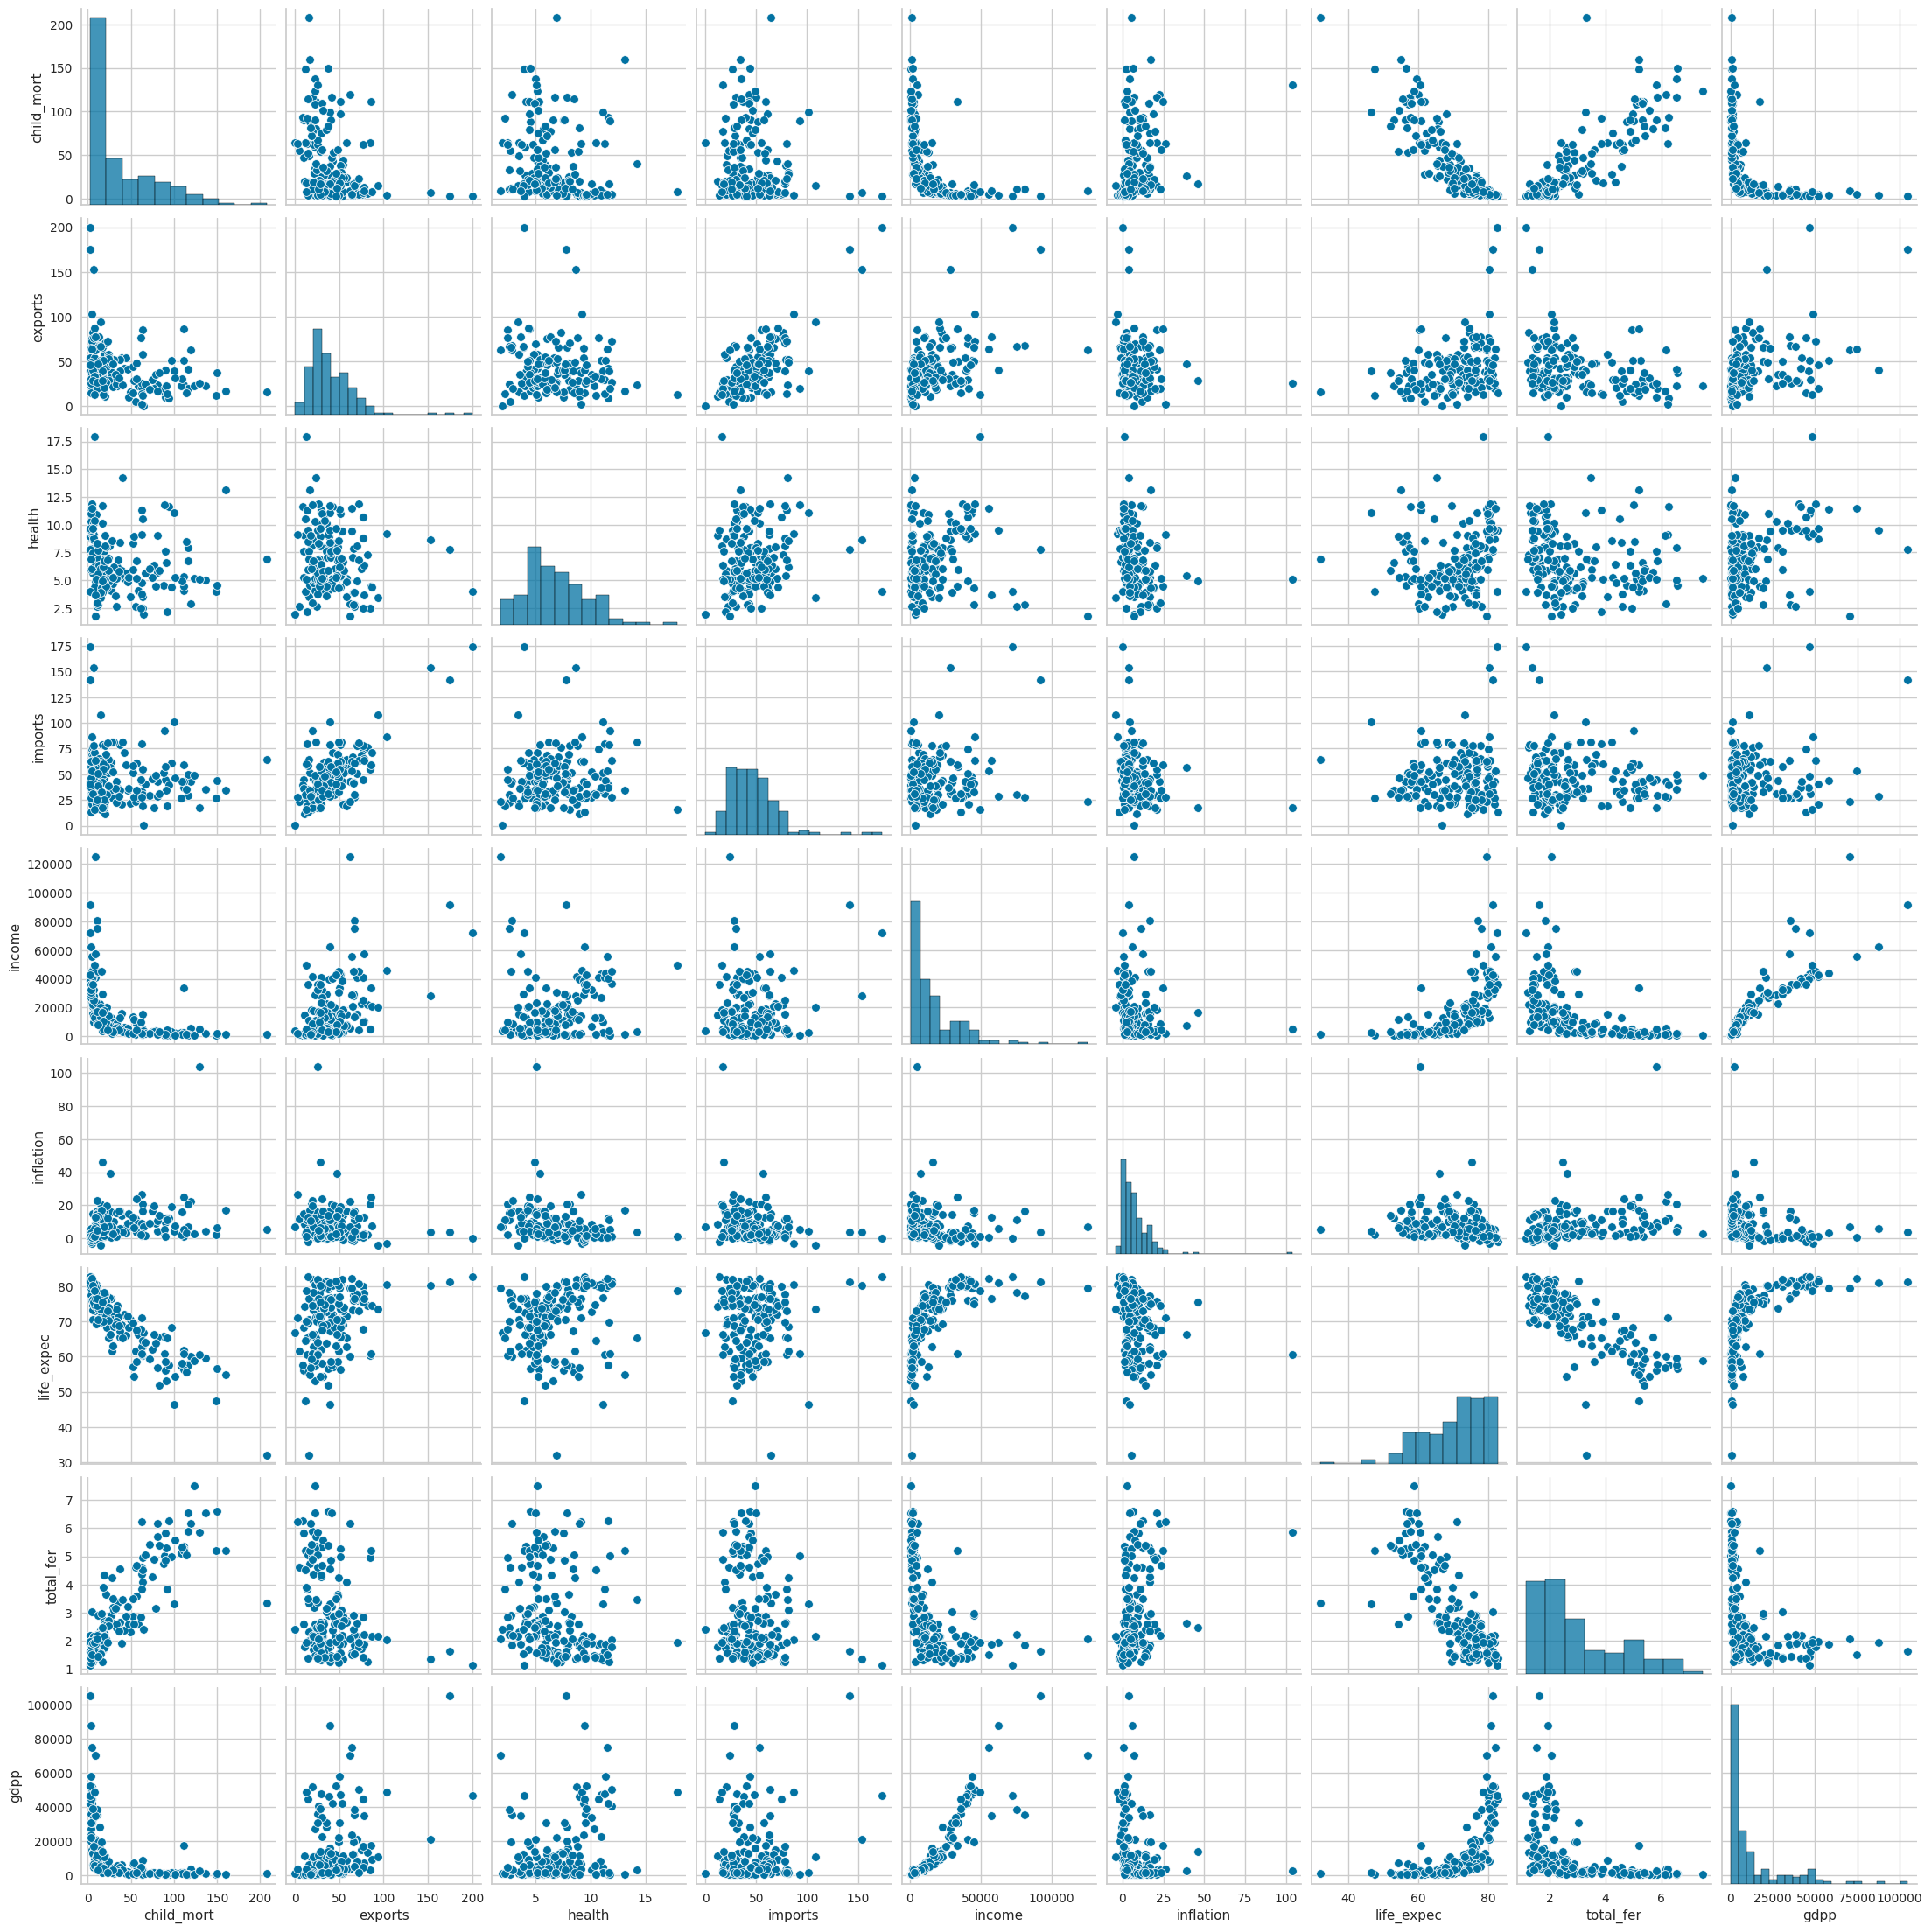

In [ ]:
# pair plot
sns.pairplot(data=df, palette="viridis")

***
<div style="border-radius:10px; padding: 15px; background-color:GhostWhite; font-size:85%; text-align:left">
<h1 align="left"><font color=royalblue>🔸Observation: </font></h1>
    
▪️ As I can see, when child_mort increased, gdpp, income, imports and exports decreased.<br>
▪️ total_fer and child mort have a direct relationship with each other.<br>
▪️ On the other hand by the increasing of life_expectancy child_mort has decreased.<br>
▪️ As the level of health has increased, the child_mort has been lower.<br>
▪️ Also when the exports increase, gdpp, income and imports have been increased.<br>
▪️ Income and gdpp have a high relationship with each other.<br>
▪️ On the other hand high income increase the life expectancy.<br>
▪️ High inflation displays a high total_fer and child_mort.<br>
▪️ Higher life_expec displays a low total_fer. Higher gdpp has led to more spending on health.<br>
</div>


<a id="4"></a>
# <p style="padding:10px;background-color:SandyBrown ;margin:0;color:Indigo;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 20px 20px;overflowGoldenRod:hidden;font-weight:500">Step 5: EDA Multivariate Analysis </p>

# 💡EDA Multivariate Analysis:
****
<div style="color:white;
           display:fill;
           border-radius:100px;
           background-color:#d9ecd0;
           font-size:100%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 30px;
              color:DarkSlateGray;">As the name suggests, Multivariate analysis looks at more than two variables. Multivariate analysis is one of the most useful methods to determine relationships and analyze patterns for any dataset.
A heat map is widely been used for Multivariate Analysis. Heat Map gives the correlation between the variables, whether it has a positive or negative correlation.
</div>


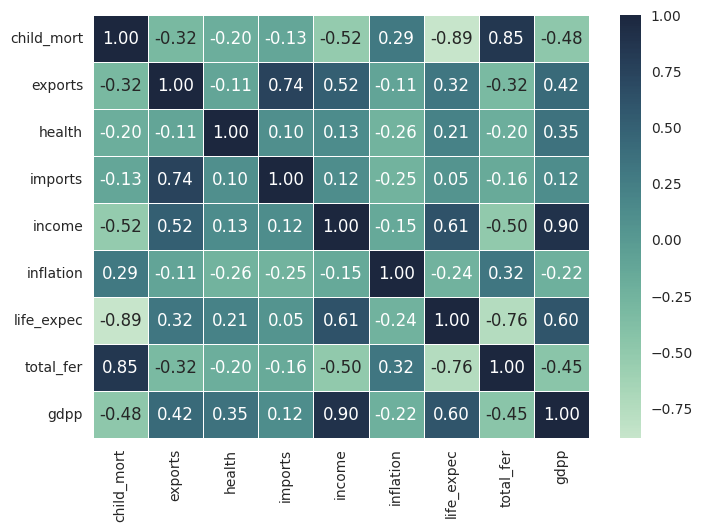

In [ ]:
# Create a heatmap of the DataFrame
sns.heatmap(df.drop(columns=["country"], axis=1).corr(), cmap=sns.cubehelix_palette(rot=-.4, as_cmap=True),
            annot=True, fmt=".2f", linewidth=.5)
plt.show()

In [ ]:
correlation = df.drop("country", axis=1).corr()
correlation

child_mort   exports    health   imports    income  inflation  \
child_mort    1.000000 -0.318093 -0.200402 -0.127211 -0.524315   0.288276   
exports      -0.318093  1.000000 -0.114408  0.737381  0.516784  -0.107294   
health       -0.200402 -0.114408  1.000000  0.095717  0.129579  -0.255376   
imports      -0.127211  0.737381  0.095717  1.000000  0.122406  -0.246994   
income       -0.524315  0.516784  0.129579  0.122406  1.000000  -0.147756   
inflation     0.288276 -0.107294 -0.255376 -0.246994 -0.147756   1.000000   
life_expec   -0.886676  0.316313  0.210692  0.054391  0.611962  -0.239705   
total_fer     0.848478 -0.320011 -0.196674 -0.159048 -0.501840   0.316921   
gdpp         -0.483032  0.418725  0.345966  0.115498  0.895571  -0.221631   

            life_expec  total_fer      gdpp  
child_mort   -0.886676   0.848478 -0.483032  
exports       0.316313  -0.320011  0.418725  
health        0.210692  -0.196674  0.345966  
imports       0.054391  -0.159048  0.115498  
income        0.611962  -0.501840  0.895571  
inflation    -0.239705   0.316921 -0.221631  
life_expec    1.000000  -0.760875  0.600089  
total_fer    -0.760875   1.000000 -0.454910  
gdpp          0.600089  -0.454910  1.000000

***
<div style="border-radius:10px; padding: 15px; background-color:GhostWhite; font-size:85%; text-align:left">
<h1 align="left"><font color=royalblue>🔸Observation: </font></h1>
    
- child_mort has high correlation with total_fer(% 0.84).And it has a negetive correlation with exports,health, imports, income,life_expec and gdpp.<br>
    
-  exports has good correllation with imports(% 0.73), income(% 0.51). On the other hand it has a negetive correlation with health, inflation and total fer.<br>
    
-  income has 61% correllation with life_expec.And it has a high correlation with gdpp(%0.89). Also it has a negetive correlation with child mort(% 0.52), total_fer (%0.50).<br>
    
-  life_expec has 0.61%  corrlation with gdpp.

***

<a id="4"></a>
# <p style="padding:10px;background-color:SandyBrown ;margin:0;color:Indigo;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 20px 20px;overflowGoldenRod:hidden;font-weight:500">Step 6:  EDA Univariate Analysis </p>

In [ ]:
# Using the bar plot show 10 countries(in High and Low of each) in each feature
def barplots(Cols):

    fig = plt.subplots(nrows=1, ncols=3, figsize=(20,4))
    plt.subplot(1, 2, 1)
    ax = sns.barplot(x="country", y=Cols, data=df.sort_values(ascending=False, by=Cols).iloc[:10],
                     edgecolor="black", palette="viridis")
    plt.xlabel("country", color="DarkSalmon", fontsize=16, fontweight="bold")
    plt.ylabel(Cols, color="DarkSalmon", fontsize=16, fontweight="bold")
    plt.xticks(rotation=90, fontsize=12)
    plt.title("Top 10 Countries with high " + Cols, fontsize=20, fontweight="bold")

    plt.subplot(1,2,2)
    ax = sns.barplot(x="country", y=Cols, data=df.sort_values(ascending=False, by=Cols).iloc[157:],
                     edgecolor="black", palette="cubehelix")
    plt.xlabel("country", color="DarkSalmon", fontsize=16, fontweight="bold")
    plt.ylabel(Cols, color="DarkSalmon", fontsize=16, fontweight="bold")
    plt.xticks(rotation=90, fontsize=12)
    plt.title("Top 10 countries with low " + Cols, fontsize=20, fontweight="bold")

    plt.show()

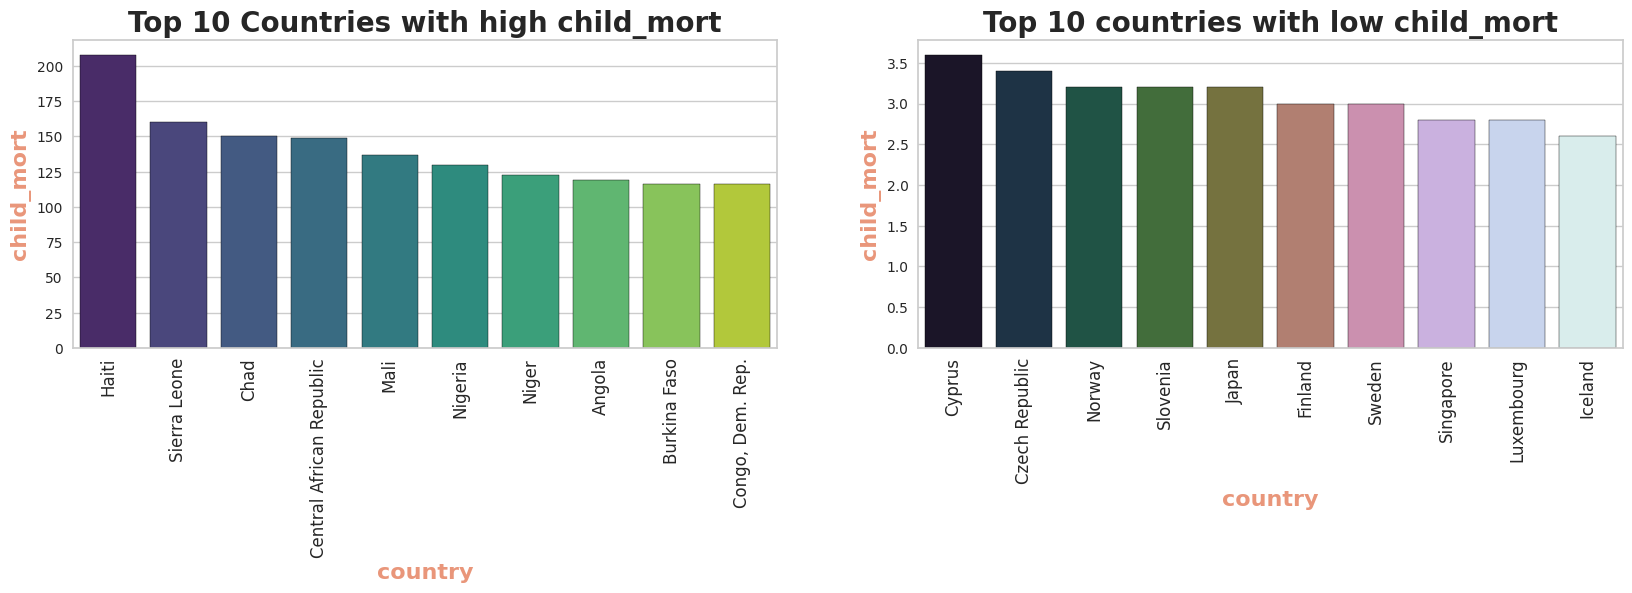

In [ ]:
barplots("child_mort")

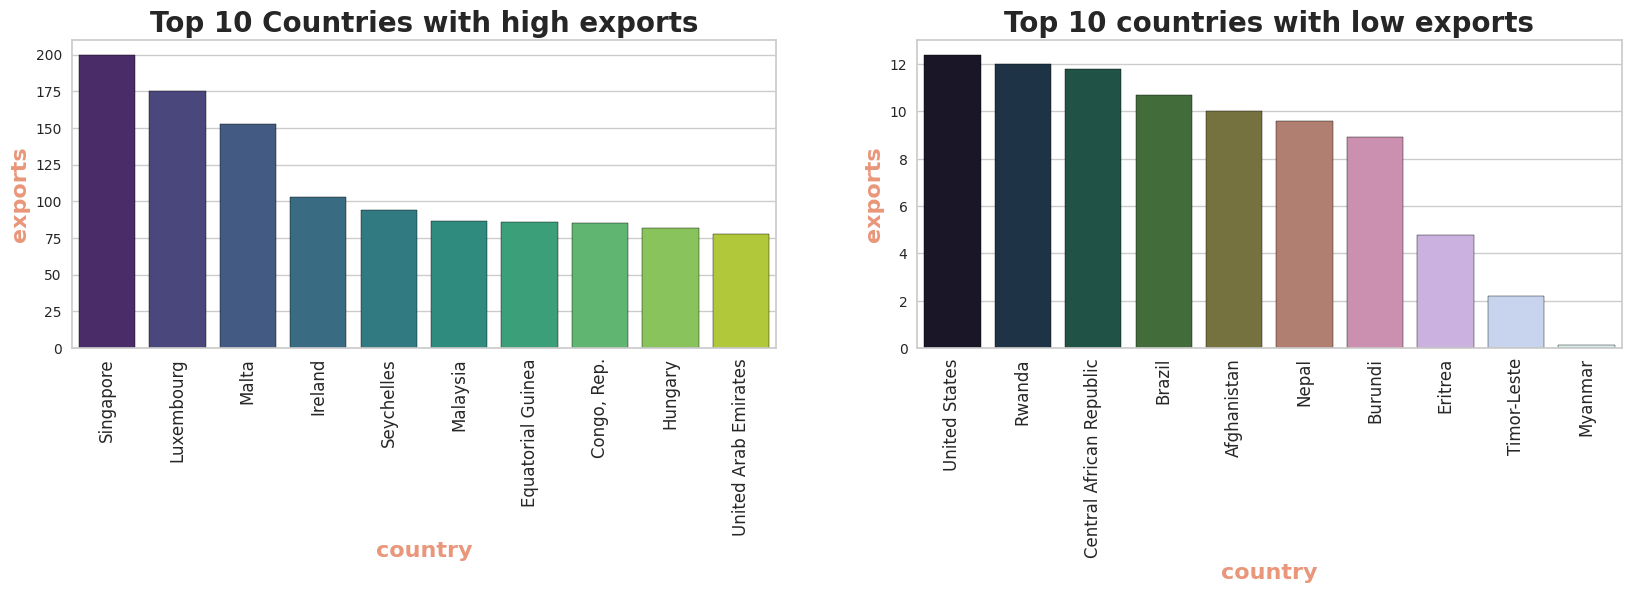

In [ ]:
barplots("exports")

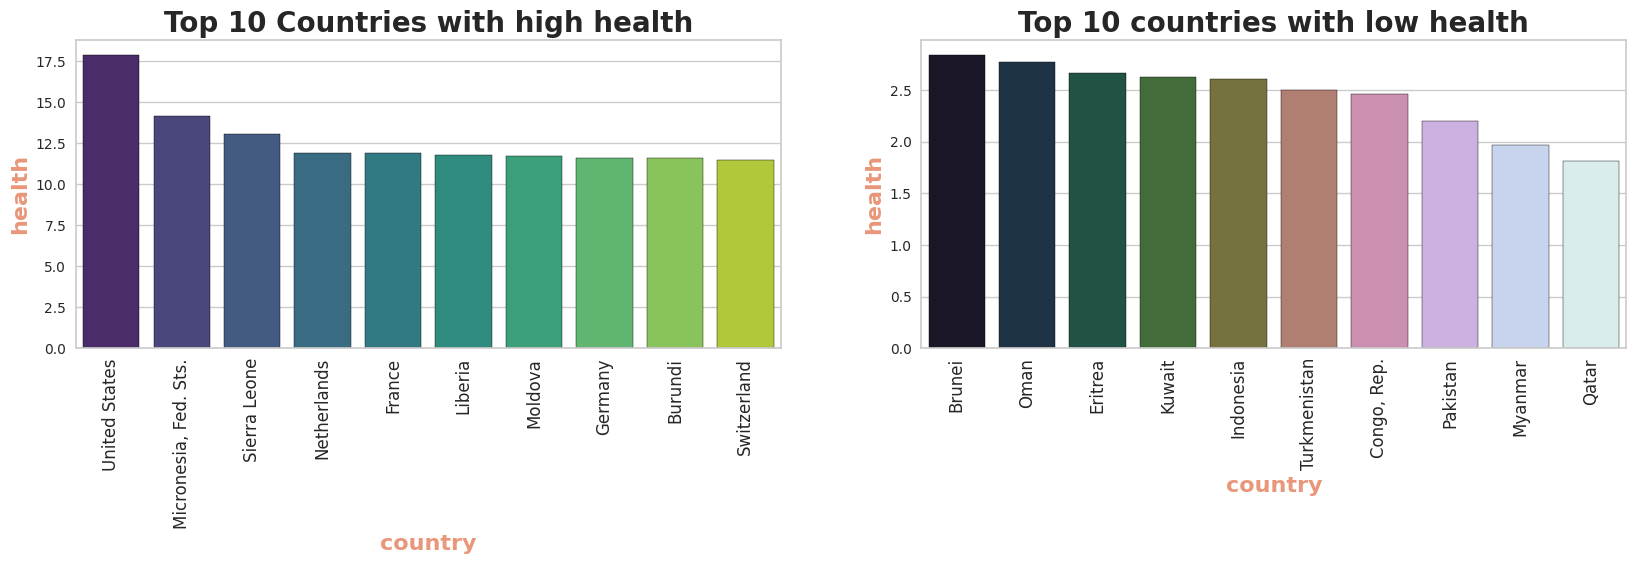

In [ ]:
barplots("health")

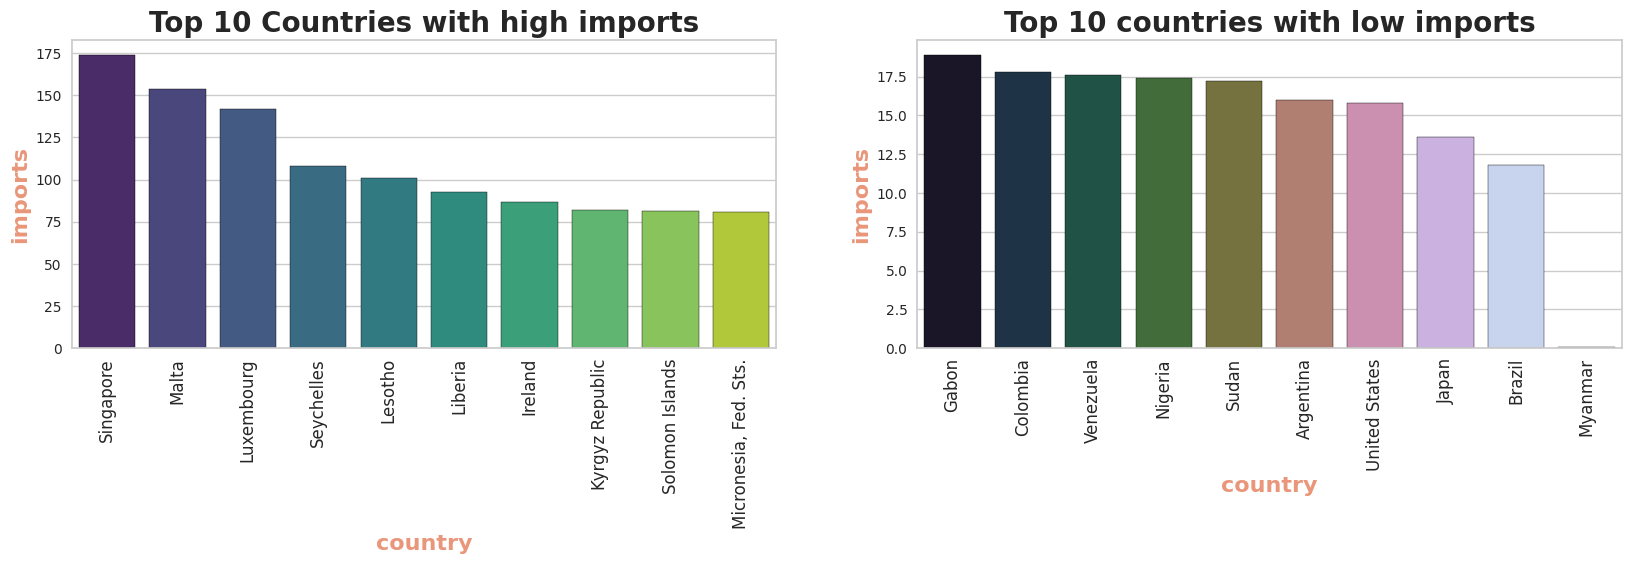

In [ ]:
barplots("imports")

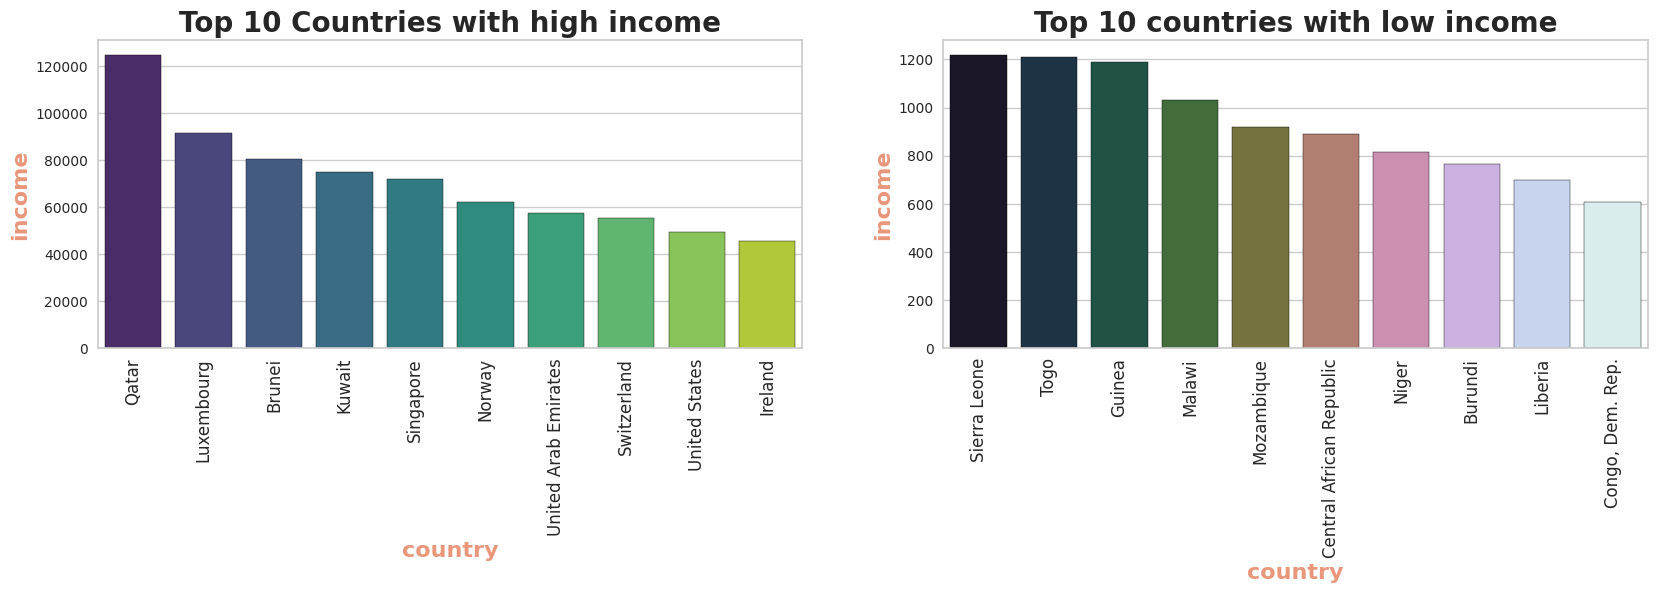

In [ ]:
barplots("income")

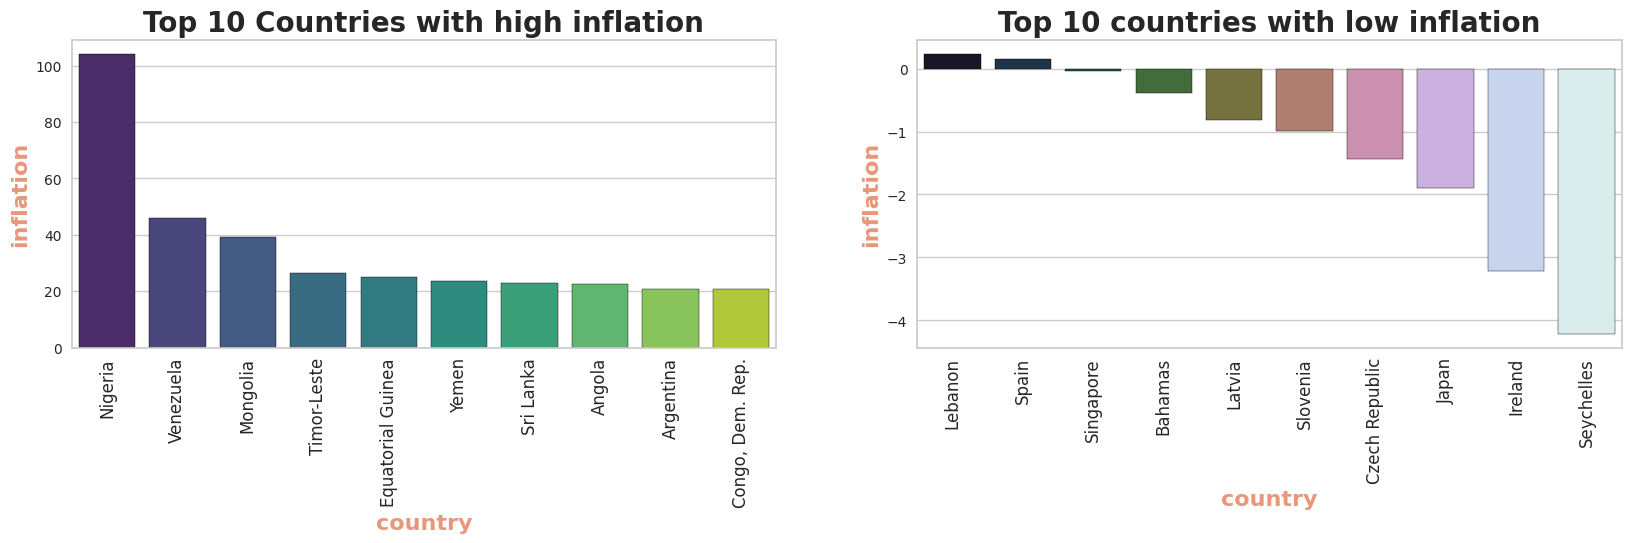

In [ ]:
barplots("inflation")

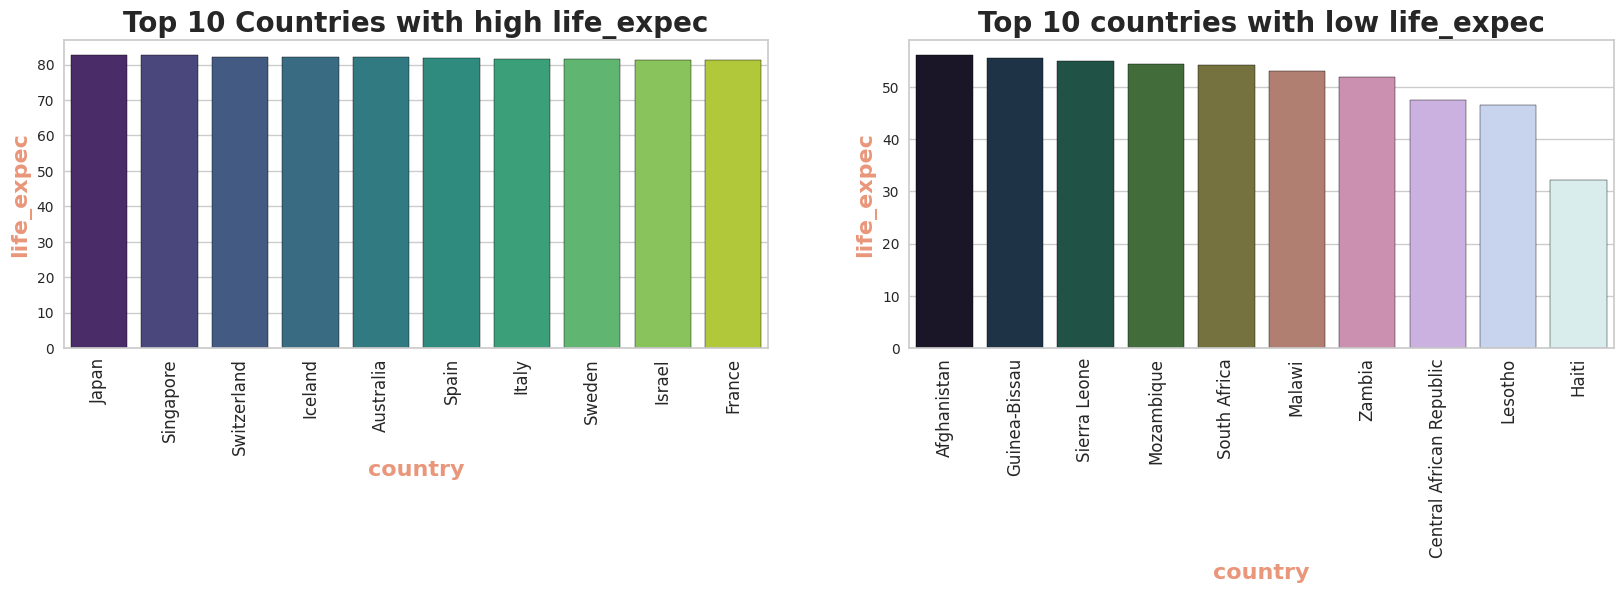

In [ ]:
barplots("life_expec")

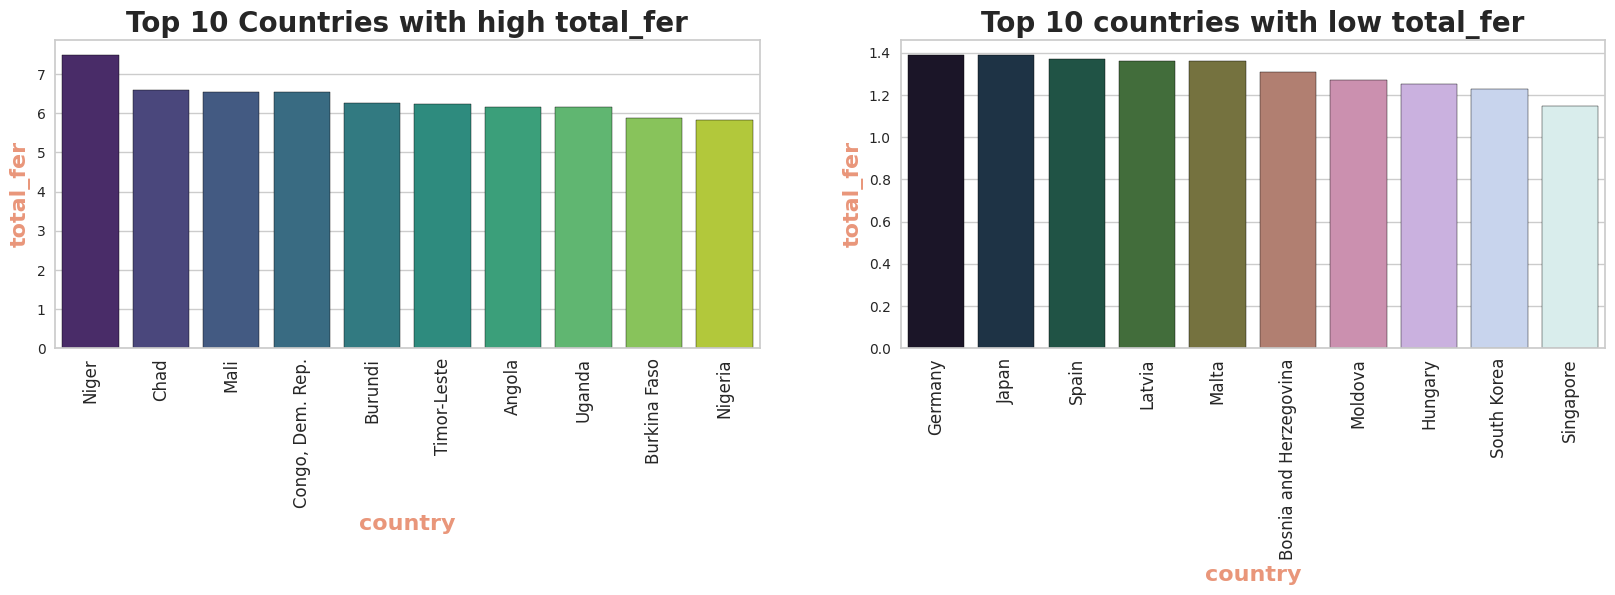

In [ ]:
barplots("total_fer")

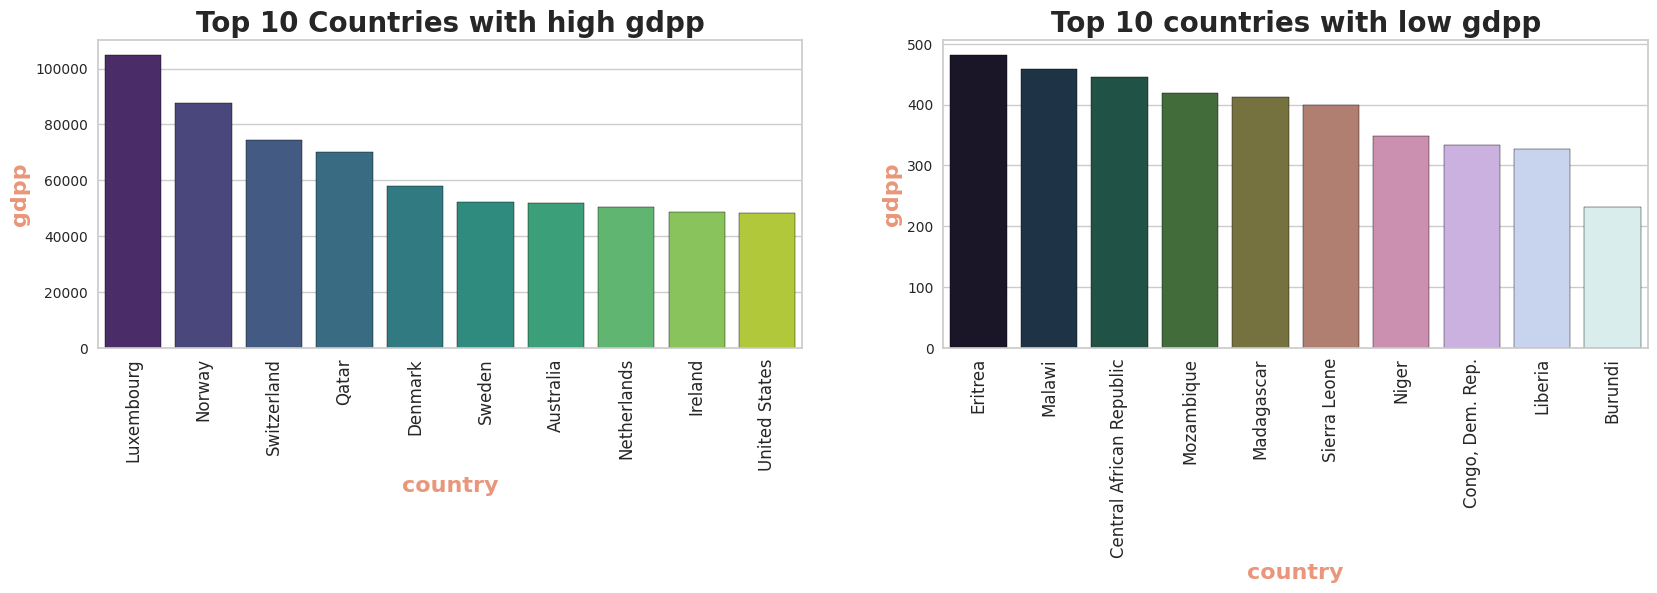

In [ ]:
barplots("gdpp")

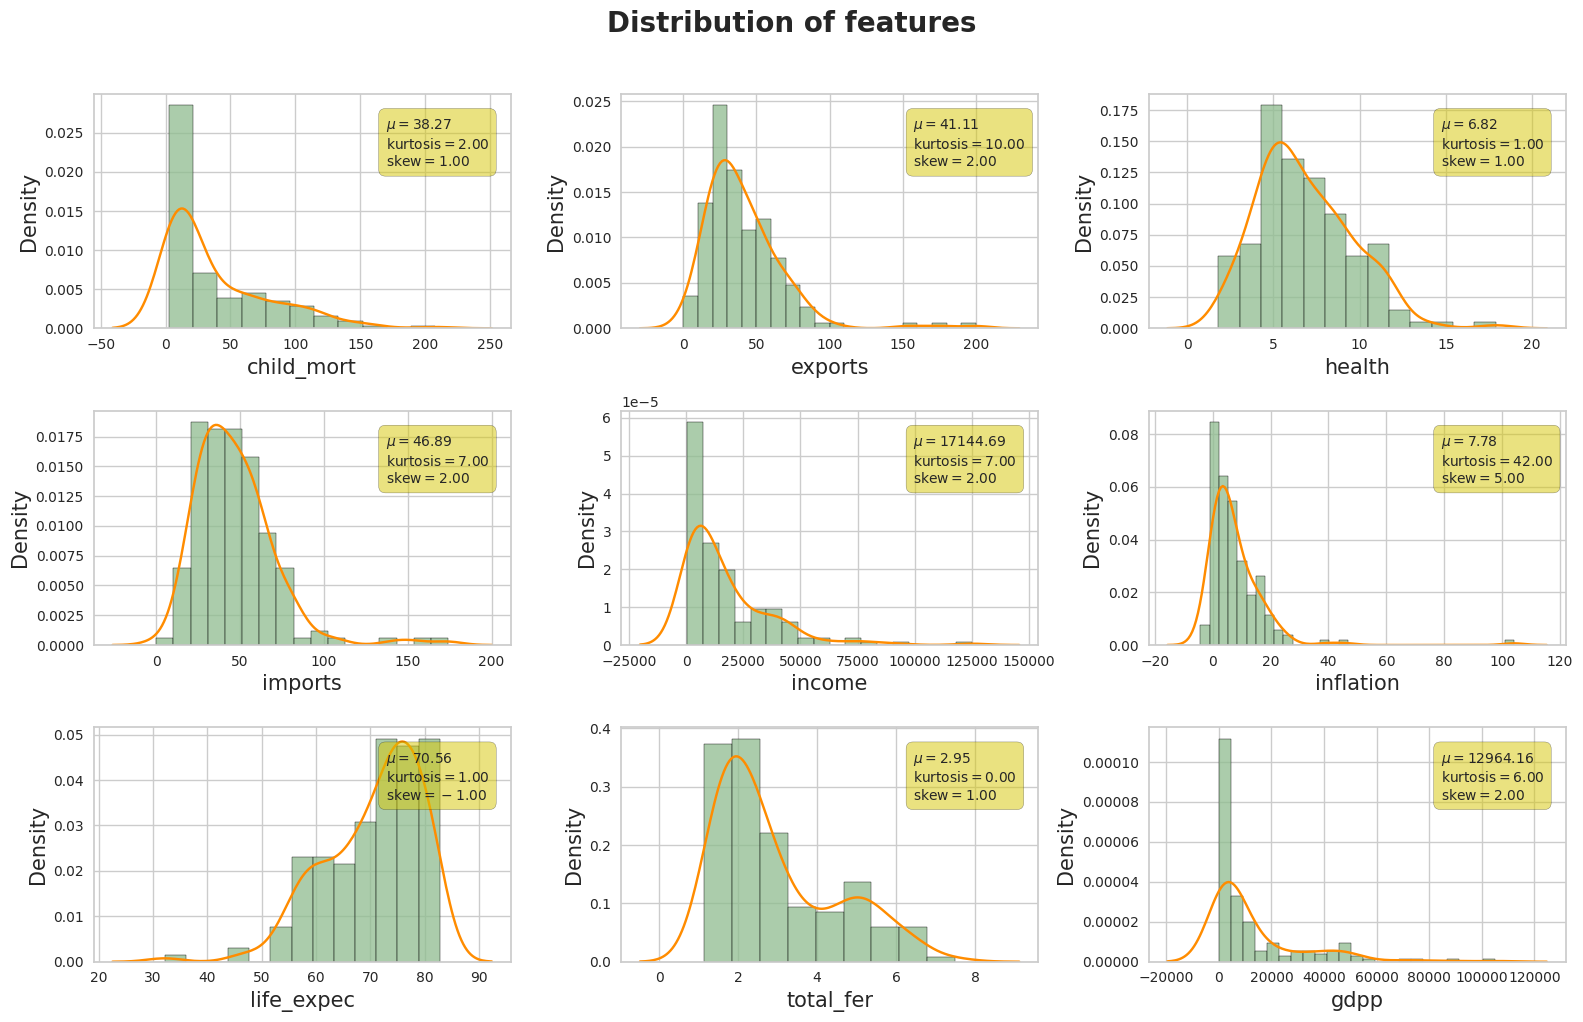

In [ ]:
# Checking distribution of features
coloumns = ["child_mort", "exports", "health", "imports", "income",
       "inflation", "life_expec", "total_fer", "gdpp"]

plt.figure(figsize=(16, 10))
for idx, col in enumerate(coloumns):
    ax = plt.subplot(3, 3, idx + 1)
    sns.histplot(x=col , data=df, stat="density", color="DarkSeaGreen")
    sns.kdeplot(x=col, data=df, color="DarkOrange")
    plt.xlabel(col, size=15,)
    plt.ylabel("Density", size=15)
    textstr = "\n".join((
    r"$\mu=%.2f$" %round(df[col].mean(), 2),
    r"$\mathrm{kurtosis}=%.2f$"%round(df[col].kurtosis()),
    r"$\mathrm{skew}=%.2f$" %round(df[col].skew()),
    ))
    ax.text(0.7, 0.90, textstr, transform=ax.transAxes, fontsize=10, verticalalignment="top",
                     bbox=dict(boxstyle="round",facecolor="y", edgecolor="black", pad=0.5, alpha=0.5))

plt.suptitle("Distribution of features", size=20, fontweight="bold", y=1.02)
plt.tight_layout()
plt.show()

child_mort
Skew : 1.45


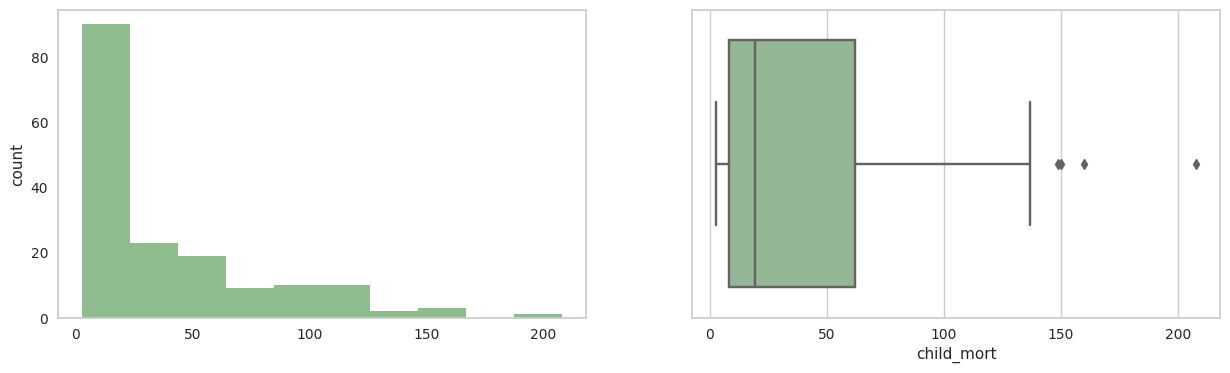

exports
Skew : 2.45


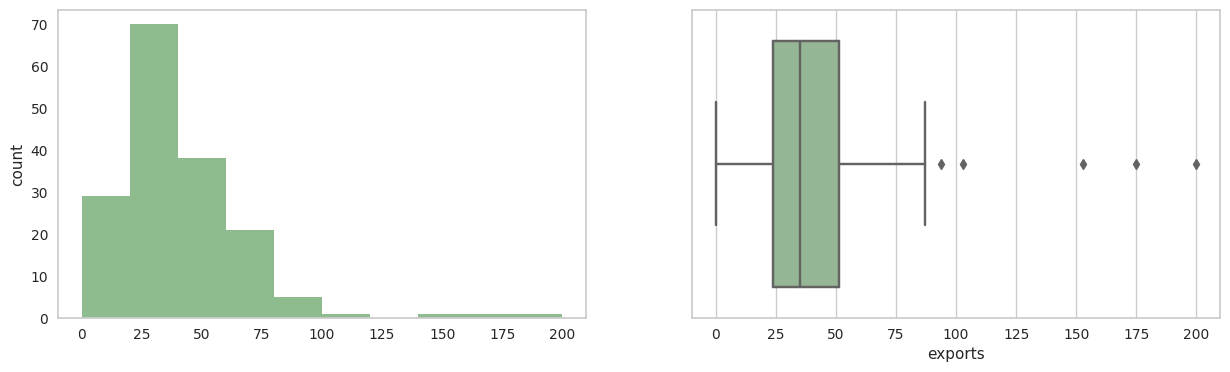

health
Skew : 0.71


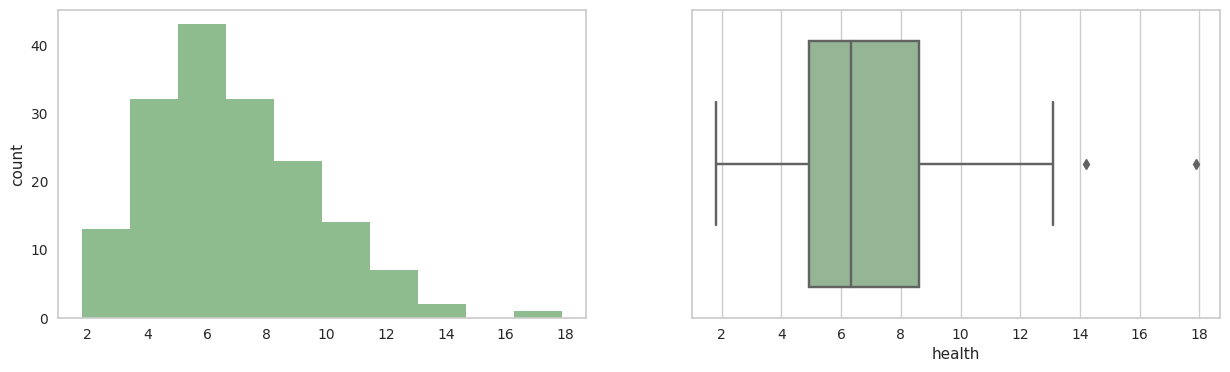

imports
Skew : 1.91


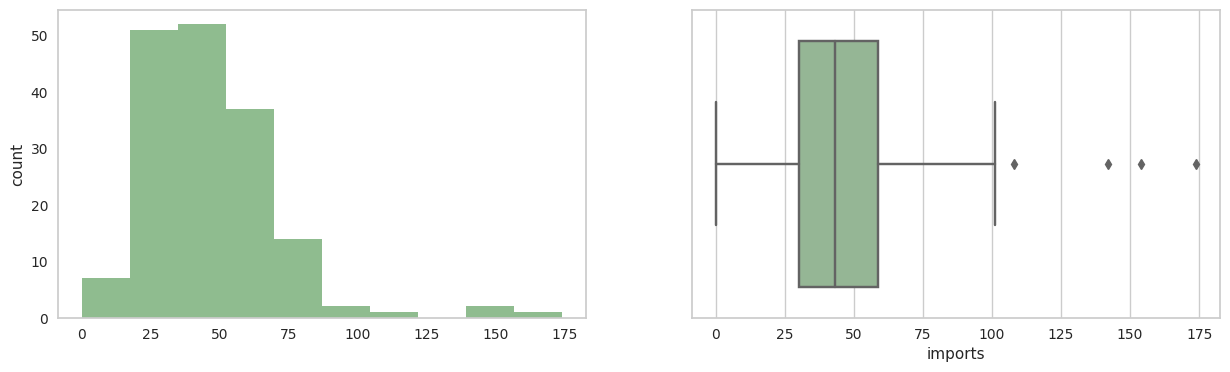

income
Skew : 2.23


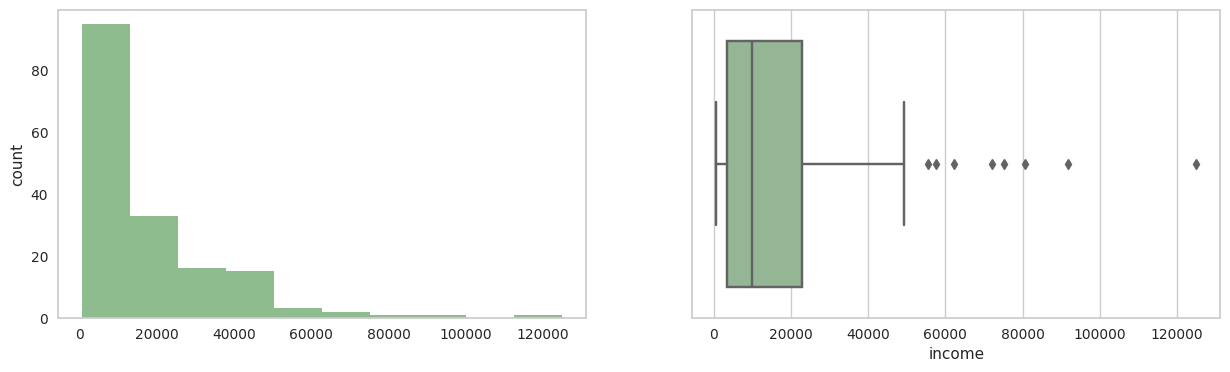

inflation
Skew : 5.15


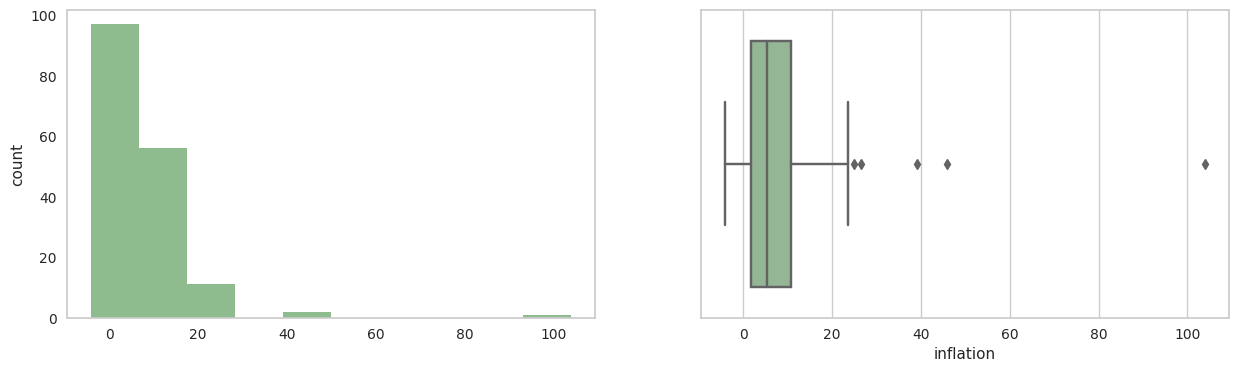

life_expec
Skew : -0.97


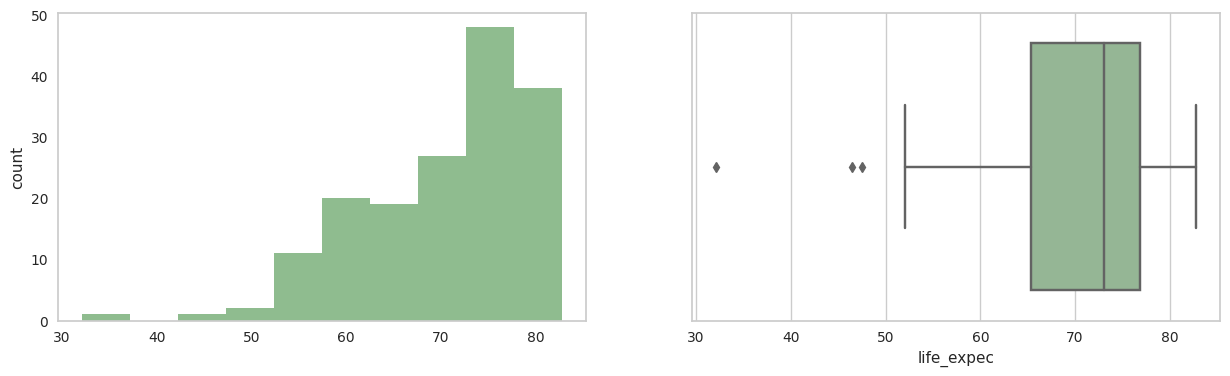

total_fer
Skew : 0.97


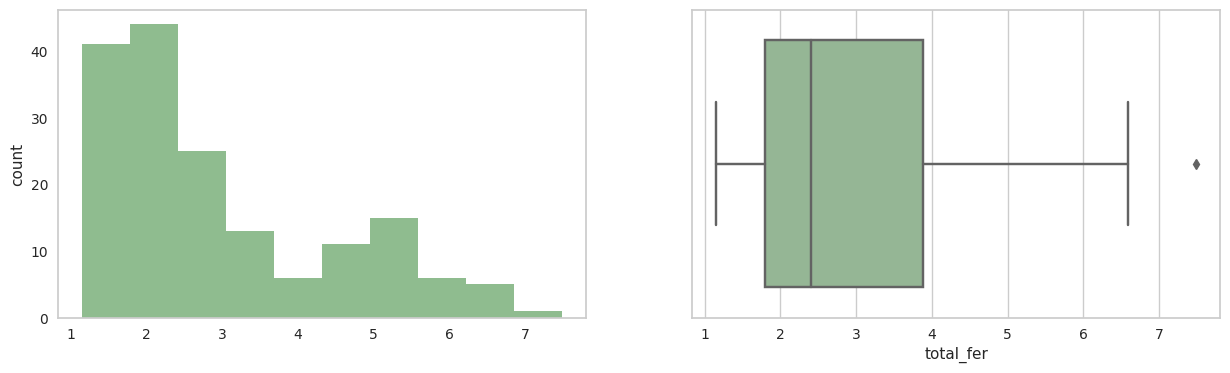

gdpp
Skew : 2.22


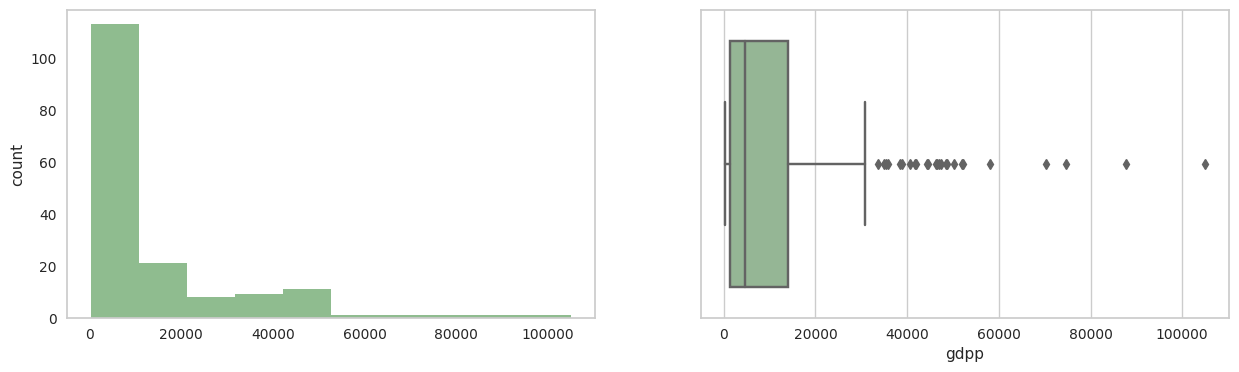

In [ ]:
# Using box plot to checking the outliers in dataset
features = ["child_mort", "exports", "health", "imports", "income",
       "inflation", "life_expec", "total_fer", "gdpp"]
for fea in features:
    print(fea)
    print("Skew :", round(df[fea].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    df[fea].hist(grid=False, color="DarkSeaGreen")
    plt.ylabel("count")
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[fea], color="DarkSeaGreen")
    plt.show()

<a id="4"></a>
# <p style="padding:10px;background-color:SandyBrown ;margin:0;color:Indigo;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 20px 20px;overflowGoldenRod:hidden;font-weight:500">Step 7: Visualization of data for noise treatment</p>

In [ ]:
# Scatterplot
fig = px.scatter(df, x="child_mort", y="total_fer")
fig.update_layout(
        title="child_mort, total_fer scatter plot",
        xaxis={
            "showgrid": True,
            "rangeslider": {
                "visible": True,
                "thickness": 0.05
            }
        },
        yaxis={
            "showgrid": True
        },
        legend={
            "orientation": "v"
        },
        paper_bgcolor="#F0F8FF"
    )
fig.show(renderer="iframe")

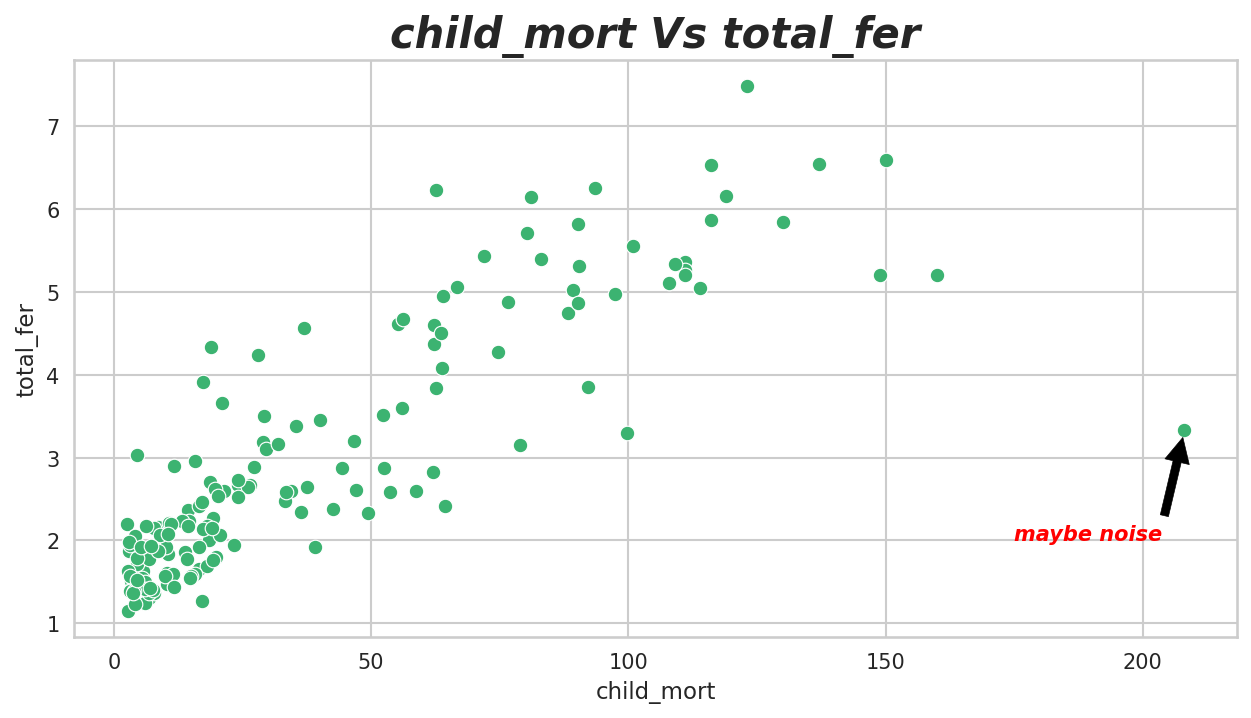

In [ ]:
plt.figure(figsize=(10,5), dpi=150)
sns.scatterplot(data=df, x="child_mort", y="total_fer", color="MediumSeaGreen")
plt.annotate("maybe noise", xy=(208,3.3),xytext=(175,2), arrowprops=dict(facecolor="black", shrink=0.05),fontsize=10,
            fontstyle = "oblique", color="red", fontweight="bold")
plt.xlabel("child_mort" )
plt.ylabel("total_fer")
plt.title("child_mort Vs total_fer", fontsize=20, fontstyle = "oblique", fontweight="bold")
plt.grid(True)
plt.show()

In [ ]:
fig = px.scatter(df, x="exports", y="imports")
fig.update_layout(
        title="exports, imports scatter plot",
        xaxis={
            "showgrid": True,
            "rangeslider": {
                "visible": True,
                "thickness": 0.05
            }
        },
        yaxis={
            "showgrid": True
        },
        legend={
            "orientation": "v"
        },
        paper_bgcolor="#F0F8FF"
    )
fig.show(renderer="iframe")

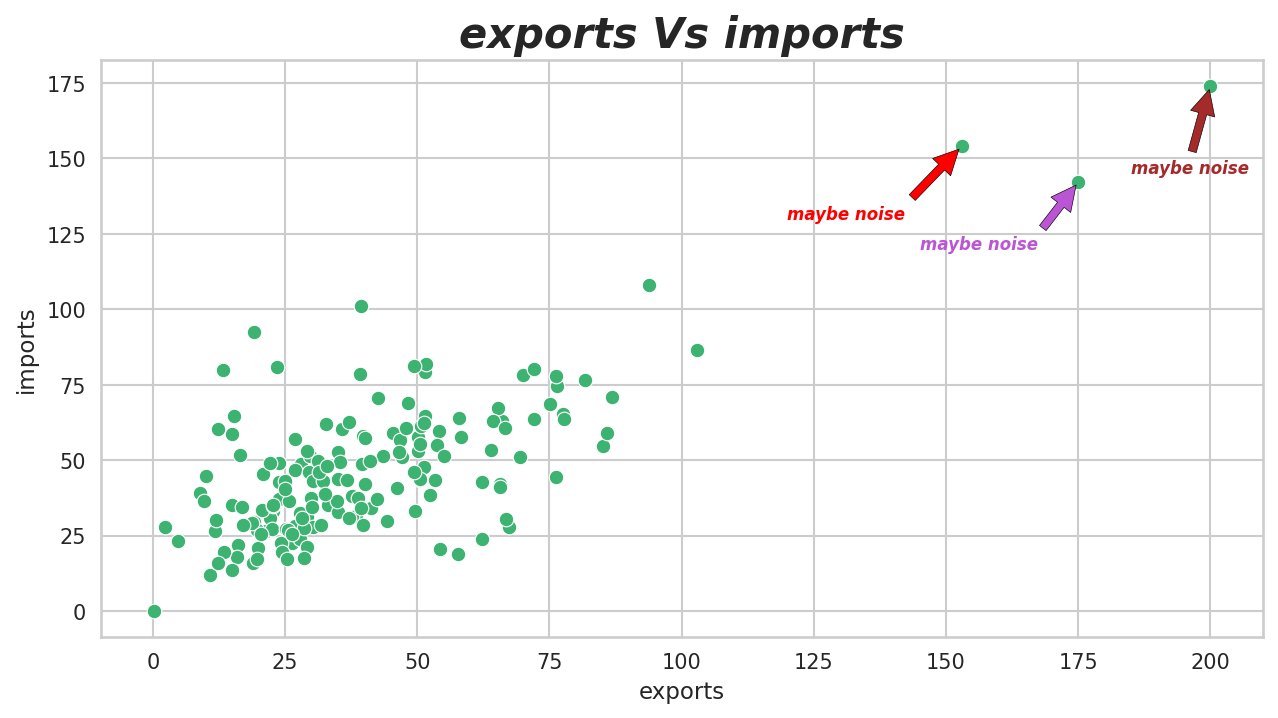

In [ ]:
plt.figure(figsize=(10,5), dpi=150)
sns.scatterplot(data=df, x="exports", y="imports", color="MediumSeaGreen")
plt.annotate("maybe noise", xy=(153,154),xytext=(120,130), arrowprops=dict(facecolor="red", shrink=0.05),fontsize=8,
            fontstyle = "oblique", color="red", fontweight="bold")
plt.annotate("maybe noise", xy=(175,142),xytext=(145,120), arrowprops=dict(facecolor="MediumOrchid", shrink=0.05),fontsize=8,
            fontstyle = "oblique", color="MediumOrchid", fontweight="bold")
plt.annotate("maybe noise", xy=(200, 174),xytext=(185,145), arrowprops=dict(facecolor="brown", shrink=0.05),fontsize=8,
            fontstyle = "oblique", color="brown", fontweight="bold")
plt.xlabel("exports")
plt.ylabel("imports")
plt.title("exports Vs imports", fontsize=20, fontstyle = "oblique", fontweight="bold")
plt.grid(True)
plt.show()

In [ ]:
fig = px.scatter(df, x="exports", y="income")
fig.update_layout(
        title="exports, income scatter plot",
        xaxis={
            "showgrid": True,
            "rangeslider": {
                "visible": True,
                "thickness": 0.05
            }
        },
        yaxis={
            "showgrid": True
        },
        legend={
            "orientation": "v"
        },
        paper_bgcolor="#F0F8FF"
    )
fig.show(renderer="iframe")

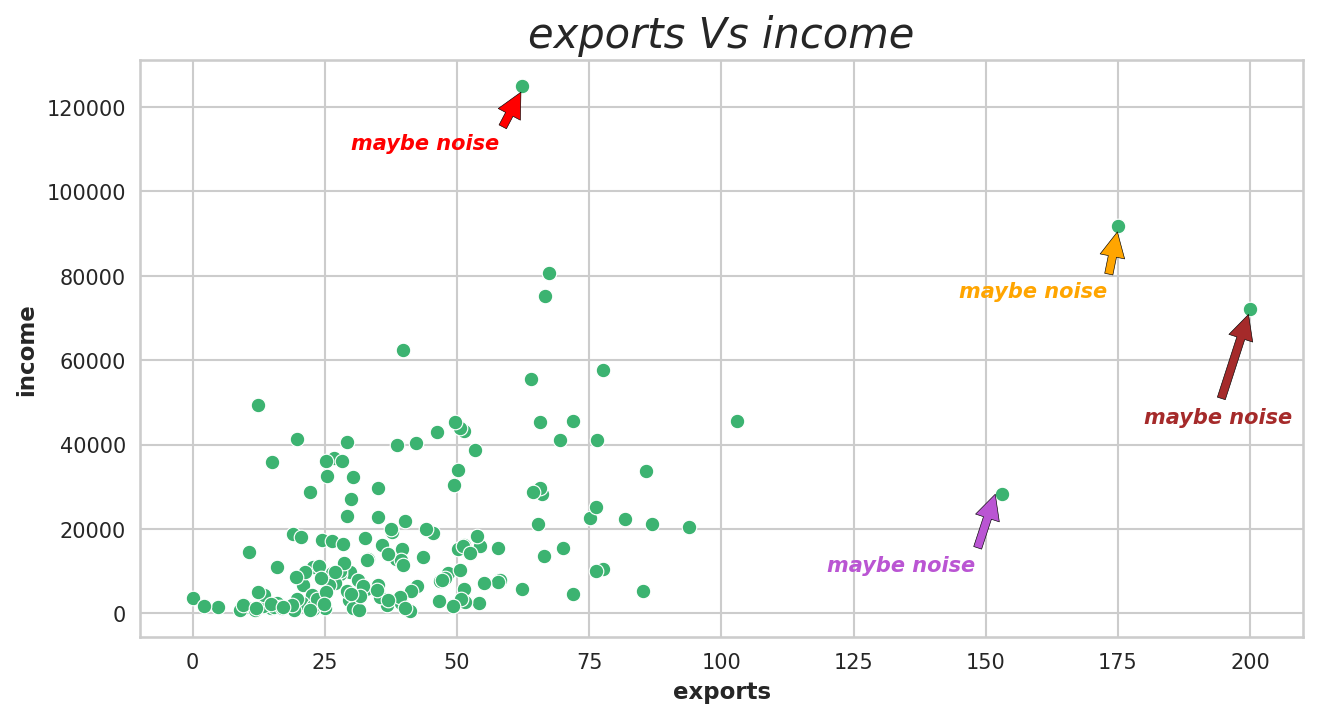

In [ ]:
plt.figure(figsize=(10,5), dpi=150)
sns.scatterplot(data=df, x="exports", y="income", color="MediumSeaGreen")
plt.annotate("maybe noise", xy=(62.3,124000),xytext=(30,110000), arrowprops=dict(facecolor="red", shrink=0.05),fontsize=10,
            fontstyle = "oblique", color="red", fontweight="bold")

plt.annotate("maybe noise", xy=(152,29000),xytext=(120,10000), arrowprops=dict(facecolor="MediumOrchid", shrink=0.05),fontsize=10,
            fontstyle = "oblique", color="MediumOrchid", fontweight="bold")

plt.annotate("maybe noise", xy=(175,91000),xytext=(145,75000), arrowprops=dict(facecolor="orange", shrink=0.05),fontsize=10,
            fontstyle = "oblique", color="orange", fontweight="bold")

plt.annotate("maybe noise", xy=(200,72000),xytext=(180,45000), arrowprops=dict(facecolor="brown", shrink=0.05),fontsize=10,
            fontstyle = "oblique", color="brown", fontweight="bold")

plt.xlabel("exports", fontweight="bold")
plt.ylabel("income", fontweight="bold")
plt.title("exports Vs income", fontsize=20, fontstyle = "oblique")
plt.grid(True)
plt.show()

In [ ]:
fig = px.scatter(df, x="income", y="gdpp")
fig.update_layout(
        title="income Vs. gdpp scatter plot",
        xaxis={
            "showgrid": True,
            "rangeslider": {
                "visible": True,
                "thickness": 0.05
            }
        },
        yaxis={
            "showgrid": True
        },
        legend={
            "orientation": "v"
        },
        paper_bgcolor="#F0F8FF"
    )
fig.show(renderer="iframe")

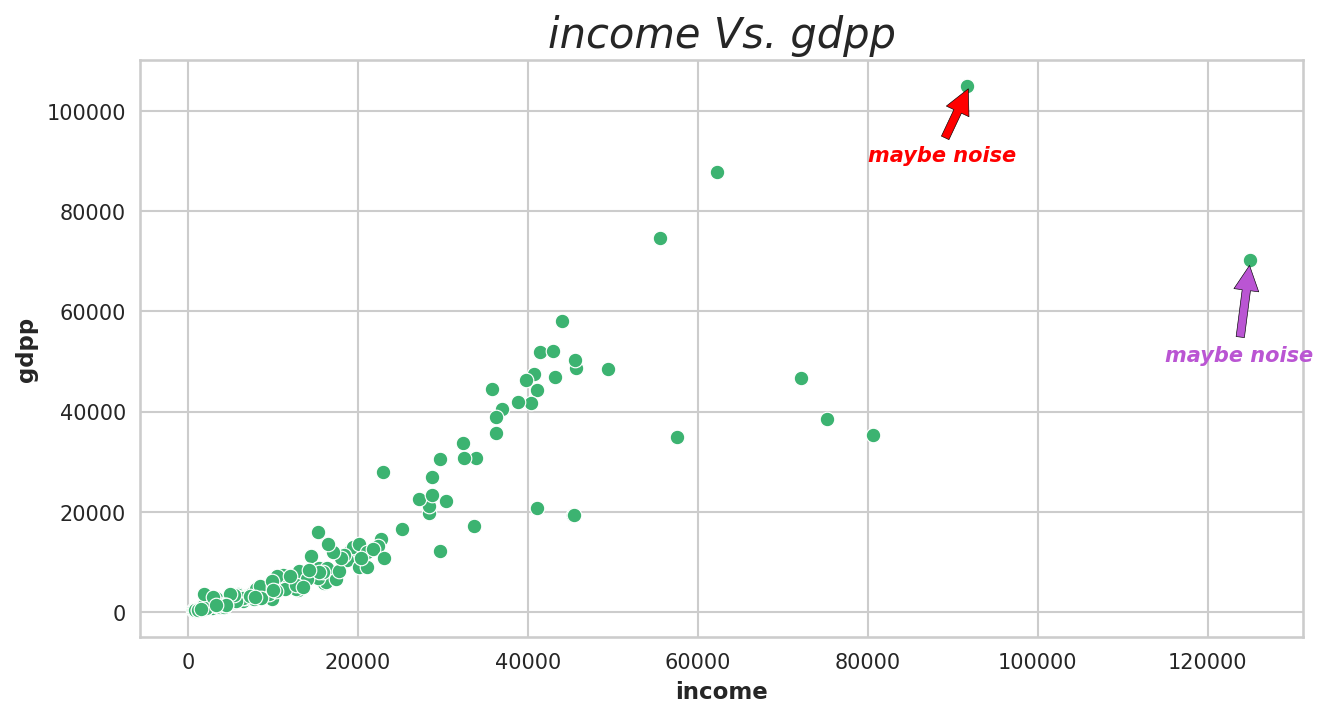

In [ ]:
plt.figure(figsize=(10,5), dpi=150)
sns.scatterplot(data=df, x="income", y="gdpp", color="MediumSeaGreen")
plt.annotate("maybe noise", xy=(92000,105000),xytext=(80000,90000), arrowprops=dict(facecolor="red", shrink=0.05),fontsize=10,
            fontstyle = "oblique", color="red", fontweight="bold")

plt.annotate("maybe noise", xy=(125000,70000),xytext=(115000,50000), arrowprops=dict(facecolor="MediumOrchid", shrink=0.05),fontsize=10,
            fontstyle = "oblique", color="MediumOrchid", fontweight="bold")


plt.xlabel("income", fontweight="bold")
plt.ylabel("gdpp", fontweight="bold")
plt.title("income Vs. gdpp", fontsize=20, fontstyle = "oblique")
plt.grid(True)
plt.show()

In [ ]:
fig = px.scatter(df, x="life_expec", y="gdpp")
fig.update_layout(
        title="life_expec Vs. gdpp scatter plot",
        xaxis={
            "showgrid": True,
            "rangeslider": {
                "visible": True,
                "thickness": 0.05
            }
        },
        yaxis={
            "showgrid": True
        },
        legend={
            "orientation": "v"
        },
        paper_bgcolor="#F0F8FF"
    )
fig.show(renderer="iframe")

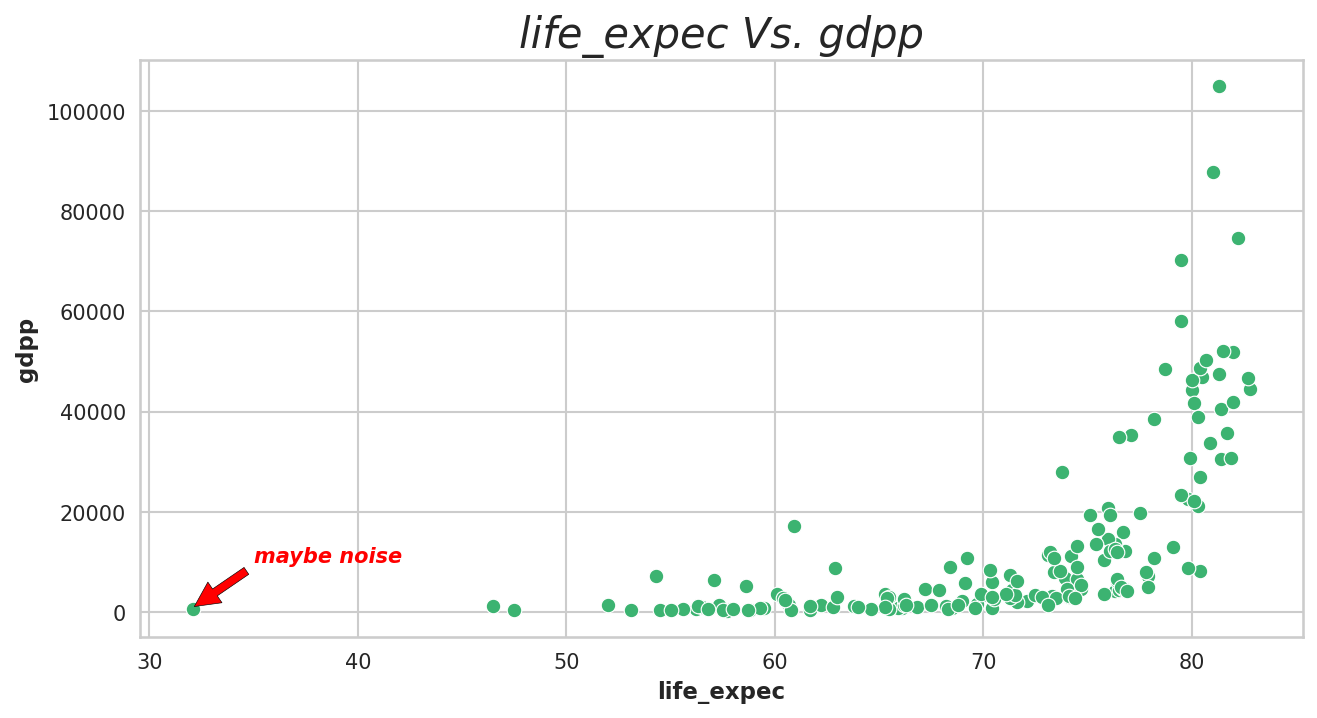

In [ ]:
plt.figure(figsize=(10,5), dpi=150)
sns.scatterplot(data=df, x="life_expec", y="gdpp", color="MediumSeaGreen")
plt.annotate("maybe noise", xy=(32,662),xytext=(35,10000), arrowprops=dict(facecolor="red", shrink=0.05),fontsize=10,
            fontstyle = "oblique", color="red", fontweight="bold")

plt.xlabel("life_expec", fontweight="bold")
plt.ylabel("gdpp", fontweight="bold")
plt.title("life_expec Vs. gdpp", fontsize=20, fontstyle = "oblique")
plt.grid(True)
plt.show()

In [ ]:
# Checking  the index of some points that "they are outliers maybe in scatter plots" we said.
columns=["child_mort", "exports", "health", "imports", "income", "inflation", "life_expec", "gdpp"]
for cols in columns:
    print(f"\n  Outliers points related to {cols}:\n")
    outliers = df[df[cols] > df[cols].quantile(0.95)]
    # Sorting by cols
    outliers = outliers.sort_values(by=cols, ascending=False)
    display(outliers)


  Outliers points related to child_mort:



country  child_mort  exports  health  imports  income  \
66                      Haiti       208.0     15.3    6.91     64.7    1500   
132              Sierra Leone       160.0     16.8   13.10     34.5    1220   
32                       Chad       150.0     36.8    4.53     43.5    1930   
31   Central African Republic       149.0     11.8    3.98     26.5     888   
97                       Mali       137.0     22.8    4.98     35.1    1870   
113                   Nigeria       130.0     25.3    5.07     17.4    5150   
112                     Niger       123.0     22.2    5.16     49.1     814   
3                      Angola       119.0     62.3    2.85     42.9    5900   

     inflation  life_expec  total_fer  gdpp  
66        5.45        32.1       3.33   662  
132      17.20        55.0       5.20   399  
32        6.39        56.5       6.59   897  
31        2.01        47.5       5.21   446  
97        4.37        59.5       6.55   708  
113     104.00        60.5       5.84  2330  
112       2.55        58.8       7.49   348  
3        22.40        60.1       6.16  3530


  Outliers points related to exports:



country  child_mort  exports  health  imports  income  \
133          Singapore         2.8    200.0    3.96    174.0   72100   
91          Luxembourg         2.8    175.0    7.77    142.0   91700   
98               Malta         6.8    153.0    8.65    154.0   28300   
73             Ireland         4.2    103.0    9.19     86.5   45700   
131         Seychelles        14.4     93.8    3.40    108.0   20400   
95            Malaysia         7.9     86.9    4.39     71.0   21100   
49   Equatorial Guinea       111.0     85.8    4.48     58.9   33700   
38         Congo, Rep.        63.9     85.1    2.46     54.7    5190   
67             Hungary         6.0     81.8    7.33     76.5   22300   

     inflation  life_expec  total_fer    gdpp  
133     -0.046        82.7       1.15   46600  
91       3.620        81.3       1.63  105000  
98       3.830        80.3       1.36   21100  
73      -3.220        80.4       2.05   48700  
131     -4.210        73.4       2.17   10800  
95       7.270        74.5       2.15    9070  
49      24.900        60.9       5.21   17100  
38      20.700        60.4       4.95    2740  
67       2.330        74.5       1.25   13100


  Outliers points related to health:



country  child_mort  exports  health  imports  income  \
159          United States         7.3    12.40    17.9     15.8   49400   
101  Micronesia, Fed. Sts.        40.0    23.50    14.2     81.0    3340   
132           Sierra Leone       160.0    16.80    13.1     34.5    1220   
54                  France         4.2    26.80    11.9     28.1   36900   
110            Netherlands         4.5    72.00    11.9     63.6   45500   
88                 Liberia        89.3    19.10    11.8     92.6     700   
102                Moldova        17.2    39.20    11.7     78.5    3910   
26                 Burundi        93.6     8.92    11.6     39.2     764   
58                 Germany         4.2    42.30    11.6     37.1   40400   

     inflation  life_expec  total_fer   gdpp  
159      1.220        78.7       1.93  48400  
101      3.800        65.4       3.46   2860  
132     17.200        55.0       5.20    399  
54       1.050        81.4       2.03  40600  
110      0.848        80.7       1.79  50300  
88       5.470        60.8       5.02    327  
102     11.100        69.7       1.27   1630  
26      12.300        57.7       6.26    231  
58       0.758        80.1       1.39  41800


  Outliers points related to imports:



country  child_mort  exports  health  imports  income  inflation  \
133        Singapore         2.8    200.0    3.96    174.0   72100     -0.046   
98             Malta         6.8    153.0    8.65    154.0   28300      3.830   
91        Luxembourg         2.8    175.0    7.77    142.0   91700      3.620   
131       Seychelles        14.4     93.8    3.40    108.0   20400     -4.210   
87           Lesotho        99.7     39.4   11.10    101.0    2380      4.150   
88           Liberia        89.3     19.1   11.80     92.6     700      5.470   
73           Ireland         4.2    103.0    9.19     86.5   45700     -3.220   
83   Kyrgyz Republic        29.6     51.6    6.18     81.7    2790     10.000   
136  Solomon Islands        28.1     49.3    8.55     81.2    1780      6.810   

     life_expec  total_fer    gdpp  
133        82.7       1.15   46600  
98         80.3       1.36   21100  
91         81.3       1.63  105000  
131        73.4       2.17   10800  
87         46.5       3.30    1170  
88         60.8       5.02     327  
73         80.4       2.05   48700  
83         68.5       3.10     880  
136        61.7       4.24    1290


  Outliers points related to income:



country  child_mort  exports  health  imports  income  \
123                 Qatar         9.0     62.3    1.81     23.8  125000   
91             Luxembourg         2.8    175.0    7.77    142.0   91700   
23                 Brunei        10.5     67.4    2.84     28.0   80600   
82                 Kuwait        10.8     66.7    2.63     30.4   75200   
133             Singapore         2.8    200.0    3.96    174.0   72100   
114                Norway         3.2     39.7    9.48     28.5   62300   
157  United Arab Emirates         8.6     77.7    3.66     63.6   57600   
145           Switzerland         4.5     64.0   11.50     53.3   55500   
159         United States         7.3     12.4   17.90     15.8   49400   

     inflation  life_expec  total_fer    gdpp  
123      6.980        79.5       2.07   70300  
91       3.620        81.3       1.63  105000  
23      16.700        77.1       1.84   35300  
82      11.200        78.2       2.21   38500  
133     -0.046        82.7       1.15   46600  
114      5.950        81.0       1.95   87800  
157     12.500        76.5       1.87   35000  
145      0.317        82.2       1.52   74600  
159      1.220        78.7       1.93   48400


  Outliers points related to inflation:



country  child_mort  exports  health  imports  income  \
113            Nigeria       130.0     25.3    5.07     17.4    5150   
163          Venezuela        17.1     28.5    4.91     17.6   16500   
103           Mongolia        26.1     46.7    5.44     56.7    7710   
149        Timor-Leste        62.6      2.2    9.12     27.8    1850   
49   Equatorial Guinea       111.0     85.8    4.48     58.9   33700   
165              Yemen        56.3     30.0    5.18     34.4    4480   
140          Sri Lanka        11.2     19.6    2.94     26.8    8560   
3               Angola       119.0     62.3    2.85     42.9    5900   
5            Argentina        14.5     18.9    8.10     16.0   18700   

     inflation  life_expec  total_fer   gdpp  
113      104.0        60.5       5.84   2330  
163       45.9        75.4       2.47  13500  
103       39.2        66.2       2.64   2650  
149       26.5        71.1       6.23   3600  
49        24.9        60.9       5.21  17100  
165       23.6        67.5       4.67   1310  
140       22.8        74.4       2.20   2810  
3         22.4        60.1       6.16   3530  
5         20.9        75.8       2.37  10300


  Outliers points related to life_expec:



country  child_mort  exports  health  imports  income  inflation  \
77         Japan         3.2     15.0    9.49     13.6   35800     -1.900   
133    Singapore         2.8    200.0    3.96    174.0   72100     -0.046   
145  Switzerland         4.5     64.0   11.50     53.3   55500      0.317   
7      Australia         4.8     19.8    8.73     20.9   41400      1.160   
68       Iceland         2.6     53.4    9.40     43.3   38800      5.470   
139        Spain         3.8     25.5    9.54     26.8   32500      0.160   
75         Italy         4.0     25.2    9.53     27.2   36200      0.319   
144       Sweden         3.0     46.2    9.63     40.7   42900      0.991   

     life_expec  total_fer   gdpp  
77         82.8       1.39  44500  
133        82.7       1.15  46600  
145        82.2       1.52  74600  
7          82.0       1.93  51900  
68         82.0       2.20  41900  
139        81.9       1.37  30700  
75         81.7       1.46  35800  
144        81.5       1.98  52100


  Outliers points related to gdpp:



country  child_mort  exports  health  imports  income  inflation  \
91    Luxembourg         2.8    175.0    7.77    142.0   91700      3.620   
114       Norway         3.2     39.7    9.48     28.5   62300      5.950   
145  Switzerland         4.5     64.0   11.50     53.3   55500      0.317   
123        Qatar         9.0     62.3    1.81     23.8  125000      6.980   
44       Denmark         4.1     50.5   11.40     43.6   44000      3.220   
144       Sweden         3.0     46.2    9.63     40.7   42900      0.991   
7      Australia         4.8     19.8    8.73     20.9   41400      1.160   
110  Netherlands         4.5     72.0   11.90     63.6   45500      0.848   
73       Ireland         4.2    103.0    9.19     86.5   45700     -3.220   

     life_expec  total_fer    gdpp  
91         81.3       1.63  105000  
114        81.0       1.95   87800  
145        82.2       1.52   74600  
123        79.5       2.07   70300  
44         79.5       1.87   58000  
144        81.5       1.98   52100  
7          82.0       1.93   51900  
110        80.7       1.79   50300  
73         80.4       2.05   48700

<div style="border-radius:5px; padding: 40px; background-color:GhostWhite; font-size:100%; text-align:left">
<h1 align="left"><font color=DarkSlateGray>🔸Observation: </font></h1>
    
🔸Haiti with 208 child mort is not noise. Haiti remains the poorest country in the Latin America and the Caribbean (LAC) region and among the poorest countries in the world.

🔸In the scatter plot of export, we had three suspicious points of noise.These are the three countries of Singapore, Luxembourg and Malta.According to the investigations carried out on the imports and exporters of these three countries, these points cannot be noise.
    
🔸Singapore is a global hub for trade and finance, and its imports and exports play a vital role in the country's economy. In 2022, Singapore's total trade was valued at $1173 , up 13.3 percent from 2021. Singapore's top imports include electronic products, machinery and equipment, mineral fuels, and chemicals. Its top exports include electronic products, machinery and equipment, refined petroleum products, and chemicals.

🔸Luxembourg is a small country in Western Europe, but it has a large economy that is heavily reliant on trade. In 2022, Luxembourg's total trade was valued at €272 billion, up 16.7 percent from 2021.Luxembourg's top imports include machinery and equipment, chemicals, and food and beverages. Its top exports include machinery and equipment, financial services, and steel.


🔸Malta is a small island nation in the Mediterranean Sea. It has a relatively small economy, but trade is important to the country. In 2022, Malta's total trade was valued at €22 billion, up 11.2 percent from 2021. Malta's top imports include machinery and equipment, mineral fuels, and chemicals. Its top exports include machinery and equipment, pharmaceuticals, and food and beverages.


Overall, the import and export situation in Singapore, Luxembourg, and Malta is strong. All three countries have experienced significant growth in trade in recent years. This growth is being driven by a number of factors, including the global economic recovery, the growth of e-commerce, and the increasing importance of Asia in the global economy.
In the aboves plots of income and gdpp , we had two points of noise.these are two countries of Qatar and Luxembourg that have high income and high gdpp. they can not be noise.

🔸In the scatter plot of income and gdpp:we have two points of noises. These are the two countries of Qatar and Luxembourg .According to the investigations carried out on the income of these countries, these points cannot be noise.
Qatar is a small country in the Middle East with a very high per capita income. In 2022, Qatar had a GDP per capita of $124,830, making it the 5th richest country in the world.

🔸Qatar :Qatar's high income is due to its large reserves of oil and natural gas. Qatar is the world's largest exporter of liquefied natural gas. Qatar's government has used its wealth to invest in infrastructure, education, and healthcare. The country has a very high standard of living. Qatar and Luxembourg are both very wealthy countries with high per capita incomes.
    
💡overall Outliers wont be tampered with as they may contain genuine insight about the countries.
    

# 💡EDA Multivariate Analysis:
****
<div style="color:white;
           display:fill;
           border-radius:100px;
           background-color:#d9ecd0;
           font-size:100%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 30px;
              color:DarkSlateGray;">As the name suggests, Multivariate analysis looks at more than two variables. Multivariate analysis is one of the most useful methods to determine relationships and analyze patterns for any dataset.
A heat map is widely been used for Multivariate Analysis. Heat Map gives the correlation between the variables, whether it has a positive or negative correlation.
</div>


<div style="border-radius:80px; padding: 40px; background-color:#d9ecd0; font-size:100%; text-align:left">
<h1 align="left"><font color=DarkSlateGray>💡Choropleth map: </font></h1>

A choropleth map is a type of thematic map that uses shading or colors to represent quantitative or qualitative data for predefined areas. Choropleth maps are often used to show the spatial distribution of data, such as population density, unemployment rates, or election results.

Choropleth maps are created by dividing a geographic area into smaller units, such as countries, states, or counties. Each unit is then assigned a color or shade based on the value of the data variable for that unit. For example, a choropleth map of population density might show each country shaded in a different color, with darker colors indicating higher population densities.

***Choropleth maps can be used to visualize a wide variety of data, including:***

- Demographic data, such as population density, age distribution, and income levels
- Economic data, such as unemployment rates, GDP per capita, and poverty rates
- Health data, such as life expectancy, disease rates, and access to healthcare
- Environmental data, such as air pollution levels, deforestation rates, and water quality
- Political data, such as election results, voter turnout, and party affiliation
    
Choropleth maps can be a powerful tool for understanding and analyzing spatial data. They can help to identify patterns and trends, and to compare different areas. Choropleth maps are also often used to communicate complex data to a general audience.

In [ ]:
# showing the location of country on world map by each columns of data
px.choropleth(df,
              locations="country",
              color="child_mort",
              locationmode="country names",
              hover_name="country",
              color_continuous_scale="geyser",
              height=700,
              projection="natural earth"
              )

In [ ]:
df[df["child_mort"]>100].sort_values(by="child_mort")

country  child_mort  exports  health  imports  income  \
106                Mozambique       101.0     31.5    5.21     46.2     918   
28                   Cameroon       108.0     22.2    5.13     27.0    2660   
63                     Guinea       109.0     30.3    4.93     43.2    1190   
49          Equatorial Guinea       111.0     85.8    4.48     58.9   33700   
17                      Benin       111.0     23.8    4.10     37.2    1820   
40              Cote d'Ivoire       111.0     50.6    5.30     43.3    2690   
64              Guinea-Bissau       114.0     14.9    8.50     35.2    1390   
25               Burkina Faso       116.0     19.2    6.74     29.6    1430   
37           Congo, Dem. Rep.       116.0     41.1    7.91     49.6     609   
3                      Angola       119.0     62.3    2.85     42.9    5900   
112                     Niger       123.0     22.2    5.16     49.1     814   
113                   Nigeria       130.0     25.3    5.07     17.4    5150   
97                       Mali       137.0     22.8    4.98     35.1    1870   
31   Central African Republic       149.0     11.8    3.98     26.5     888   
32                       Chad       150.0     36.8    4.53     43.5    1930   
132              Sierra Leone       160.0     16.8   13.10     34.5    1220   
66                      Haiti       208.0     15.3    6.91     64.7    1500   

     inflation  life_expec  total_fer   gdpp  
106      7.640        54.5       5.56    419  
28       1.910        57.3       5.11   1310  
63      16.100        58.0       5.34    648  
49      24.900        60.9       5.21  17100  
17       0.885        61.8       5.36    758  
40       5.390        56.3       5.27   1220  
64       2.970        55.6       5.05    547  
25       6.810        57.9       5.87    575  
37      20.800        57.5       6.54    334  
3       22.400        60.1       6.16   3530  
112      2.550        58.8       7.49    348  
113    104.000        60.5       5.84   2330  
97       4.370        59.5       6.55    708  
31       2.010        47.5       5.21    446  
32       6.390        56.5       6.59    897  
132     17.200        55.0       5.20    399  
66       5.450        32.1       3.33    662

In [ ]:
px.choropleth(df,
              locations="country",
              color="exports",
              locationmode="country names",
              hover_name="country",
              color_continuous_scale='geyser',
              height=400,
              projection="natural earth"
              )

In [ ]:
px.choropleth(df,
              locations="country",
              color="health",
              locationmode="country names",
              hover_name="country",
              color_continuous_scale='geyser',
              height=400,
              projection="natural earth"
              )

In [ ]:
px.choropleth(df,
              locations="country",
              color="imports",
              locationmode="country names",
              hover_name="country",
              color_continuous_scale='geyser',
              height=400,
              projection="natural earth"
              )

In [ ]:
px.choropleth(df,
              locations="country",
              color="income",
              locationmode="country names",
              hover_name="country",
              color_continuous_scale='geyser',
              height=400,
              projection="natural earth"
              )

In [ ]:
px.choropleth(df,
              locations="country",
              color="inflation",
              locationmode="country names",
              hover_name="country",
              color_continuous_scale='geyser',
              height=400,
              projection="natural earth"
              )

In [ ]:
px.choropleth(df,
              locations="country",
              color="life_expec",
              locationmode="country names",
              hover_name="country",
              color_continuous_scale='geyser',
              height=400,
              projection="natural earth"
              )

In [ ]:
px.choropleth(df,
              locations="country",
              color="total_fer",
              locationmode="country names",
              hover_name="country",
              color_continuous_scale='geyser',
              height=400,
              projection="natural earth"
              )

In [ ]:
px.choropleth(df,
              locations="country",
              color="gdpp",
              locationmode="country names",
              hover_name="country",
              color_continuous_scale='geyser',
              height=400,
              projection="natural earth"
              )

<a id="4"></a>
# <p style="padding:10px;background-color:SandyBrown ;margin:0;color:Indigo;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 20px 20px;overflowGoldenRod:hidden;font-weight:500">Step 10: Standardize data</p>

<div style="border-radius:40px; padding: 15px; background-color:#d9ecd0; font-size:100%; text-align:left">
<h1 align="left"><font color=DarkSlateGray>💡StandardScaler: </font></h1>

StandardScaler is a scikit-learn class that can be used to standardize data. It performs the following steps:

1. Calculates the mean and standard deviation of each feature in the training data.
2. Subtracts the mean from each feature value.
3. Divides each feature value by the standard deviation.
    
This process results in a new dataset where each feature has a mean of **0** and a standard deviation of **1**.

StandardScaler is a useful tool for many machine learning algorithms. For example, linear models such as logistic regression and support vector machines (SVMs) can benefit from having standardized data as input. This is because standardized data makes it easier for the algorithm to learn the relationships between the features.

In [ ]:
# Standardization
df1 = df.drop(columns=["country"], axis=1)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df1)
scaled_df = pd.DataFrame(scaled_data, columns=df1.columns)

In [ ]:
scaled_df

child_mort   exports    health   imports    income  inflation  \
0      1.291532 -1.138280  0.279088 -0.082455 -0.808245   0.157336   
1     -0.538949 -0.479658 -0.097016  0.070837 -0.375369  -0.312347   
2     -0.272833 -0.099122 -0.966073 -0.641762 -0.220844   0.789274   
3      2.007808  0.775381 -1.448071 -0.165315 -0.585043   1.387054   
4     -0.695634  0.160668 -0.286894  0.497568  0.101732  -0.601749   
..          ...       ...       ...       ...       ...        ...   
162   -0.225578  0.200917 -0.571711  0.240700 -0.738527  -0.489784   
163   -0.526514 -0.461363 -0.695862 -1.213499 -0.033542   3.616865   
164   -0.372315  1.130305  0.008877  1.380030 -0.658404   0.409732   
165    0.448417 -0.406478 -0.597272 -0.517472 -0.658924   1.500916   
166    1.114951 -0.150348 -0.338015 -0.662477 -0.721358   0.590015   

     life_expec  total_fer      gdpp  
0     -1.619092   1.902882 -0.679180  
1      0.647866  -0.859973 -0.485623  
2      0.670423  -0.038404 -0.465376  
3     -1.179234   2.128151 -0.516268  
4      0.704258  -0.541946 -0.041817  
..          ...        ...       ...  
162   -0.852161   0.365754 -0.546913  
163    0.546361  -0.316678  0.029323  
164    0.286958  -0.661206 -0.637754  
165   -0.344633   1.140944 -0.637754  
166   -2.092785   1.624609 -0.629546  

[167 rows x 9 columns]

<a id="4"></a>
# <p style="padding:10px;background-color:SandyBrown ;margin:0;color:Indigo;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 20px 20px;overflowGoldenRod:hidden;font-weight:500">Step 11: Creat models and evaluation</p>

<div style="border-radius:40px; padding: 15px; background-color:#d9ecd0; font-size:100%; text-align:left">
<h1 align="left"><font color=DarkSlateGray>💡Principal Component Analysis (PCA): </font></h1>  
    
- As the number of features or dimensions in a dataset increases, the amount of data required to obtain a statistically significant result increases exponentially. This can lead to issues such as overfitting, increased computation time, and reduced accuracy of machine learning models this is known as the curse of dimensionality problems that arise while working with high-dimensional data.

- As the number of dimensions increases, the number of possible combinations of features increases exponentially, which makes it computationally difficult to obtain a representative sample of the data and it becomes expensive to perform tasks such as clustering or classification because it becomes. Additionally, some machine learning algorithms can be sensitive to the number of dimensions, requiring more data to achieve the same level of accuracy as lower-dimensional data.

- To address the curse of dimensionality, Feature engineering techniques are used which include feature selection and feature extraction. Dimensionality reduction is a type of feature extraction technique that aims to reduce the number of input features while retaining as much of the original information as possible.


- Principal Component Analysis(PCA) technique was introduced by the mathematician Karl Pearson in 1901. It works on the condition that while the data in a higher dimensional space is mapped to data in a lower dimension space, the variance of the data in the lower dimensional space should be maximum.

- Principal Component Analysis (PCA) is a statistical procedure that uses an orthogonal transformation that converts a set of correlated variables to a set of uncorrelated variables.PCA is the most widely used tool in exploratory data analysis and in machine learning for predictive models. Moreover, Principal Component Analysis (PCA) is an unsupervised learning algorithm technique used to examine the interrelations among a set of variables. It is also known as a general factor analysis where regression determines a line of best fit.
- The main goal of Principal Component Analysis (PCA) is to reduce the dimensionality of a dataset while preserving the most important patterns or relationships between the variables without any prior knowledge of the target variables.
- Principal Component Analysis (PCA) is used to reduce the dimensionality of a data set by finding a new set of variables, smaller than the original set of variables, retaining most of the sample’s information, and useful for the regression and classification of data.
    
    
<div style="border-radius:40px; padding: 15px; background-color:#d9ecd0; font-size:100%; text-align:left">
<h1 align="left"><font color=DarkSlateGray>💡What is the cumulative explained variance by number of principal components? </font></h1>
    
- The plot of the cumulative explained variance ratio shows how much of the total variance in the data is retained as we increase the number of principal components. The x-axis represents the number of components, and the y-axis represents the cumulative explained variance ratio.

<div style="border-radius:40px; padding: 15px; background-color:#d9ecd0; font-size:100%; text-align:left">
<h1 align="left"><font color=DarkSlateGray>💡What is Explained Variance?</font></h1>
    
    
- PCA is a linear transformation technique that identifies the directions that capture the most variation in the data and projects the data onto those directions, which are called principal components. Each principal component is a linear combination of the original variables, and the first principal component captures the most variation in the data, the second principal component captures the second-most variation, and so on.

- Explained variance is a statistical measure of how much variation in a dataset can be attributed to each of the principal components (eigenvectors) generated by the principal component analysis (PCA) method. In very basic terms, it refers to the amount of variability in a data set that can be attributed to each individual principal component. In other words, it tells us how much of the total variance is “explained” by each component. This is important because it allows us to rank the components in order of importance, and to focus on the most important ones when interpreting the results of our analysis.




<Figure size 1000x1000 with 0 Axes>

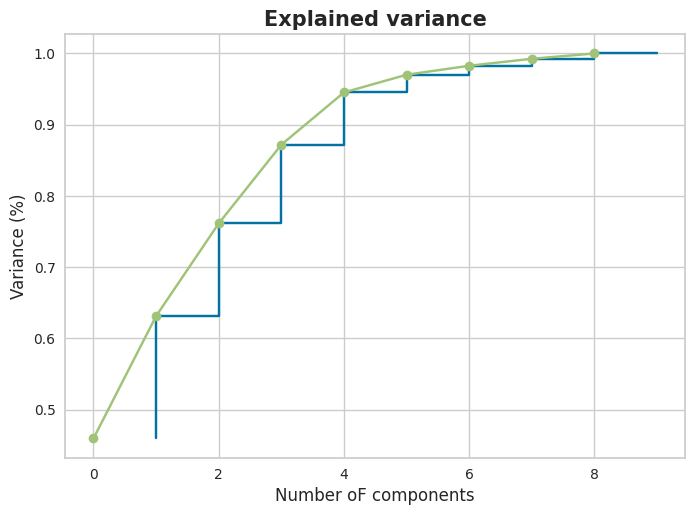

In [ ]:
# Pass through the scaled data set into our PCA class object
pca = PCA()
pca = pca.fit(scaled_df)
plt.figure(figsize=(10, 10))
plt.figure()
plt.step(list(range(1, 10)), np.cumsum(pca.explained_variance_ratio_))
plt.plot(np.cumsum(pca.explained_variance_ratio_), "go-")
plt.xlabel("Number oF components", fontsize=12)
plt.ylabel("Variance (%)", fontsize=12)
plt.title("Explained variance", fontsize=15, fontweight="bold")

# Show the plot
plt.show()

In [ ]:
# Now creat pca model with 4 components
pca = PCA(n_components=4) # we choise 4 componenets
pca.fit(scaled_df)
data_pca = pca.transform(scaled_df)
df_pca = pd.DataFrame(data_pca, columns=["PC1", "PC2", "PC3", "PC4"])
df_pca

PC1       PC2       PC3       PC4
0   -2.913025  0.095621 -0.718118  1.005255
1    0.429911 -0.588156 -0.333486 -1.161059
2   -0.285225 -0.455174  1.221505 -0.868115
3   -2.932423  1.695555  1.525044  0.839625
4    1.033576  0.136659 -0.225721 -0.847063
..        ...       ...       ...       ...
162 -0.820631  0.639570 -0.389923 -0.706595
163 -0.551036 -1.233886  3.101350 -0.115311
164  0.498524  1.390744 -0.238526 -1.074098
165 -1.887451 -0.109453  1.109752  0.056257
166 -2.864064  0.485998  0.223167  0.816364

[167 rows x 4 columns]

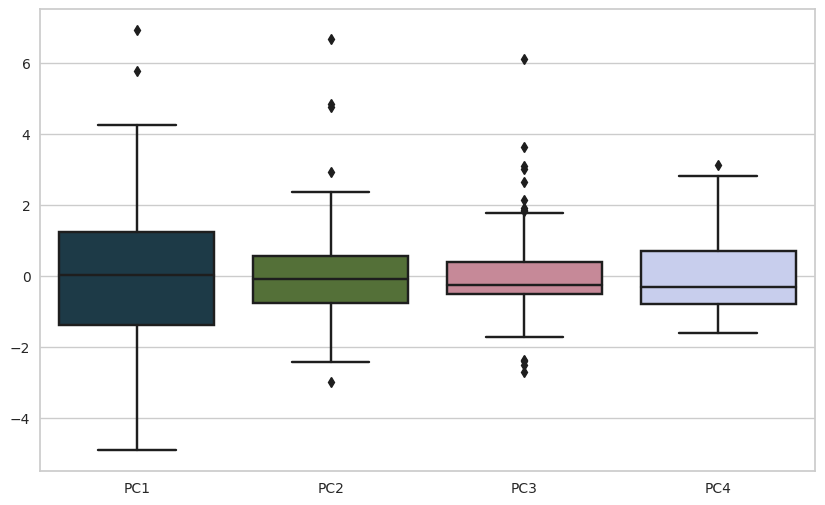

In [ ]:
# Box plot
fig = plt.figure(figsize=(10,6))
sns.boxplot(data=df_pca, palette="cubehelix")
plt.show()

<div style="border-radius:40px; padding: 15px; background-color:#d9ecd0; font-size:100%; text-align:left">
<h1 align="left"><font color=DarkSlateGray>💡KMeans clustering: </font></h1>
    
K-means clustering is a machine learning algorithm that groups data points into a predefined number of clusters. It is a type of unsupervised learning, meaning that the algorithm does not need to be trained on labeled data. Instead, it groups data points based on their similarity to each other. K-means clustering works by first initializing a set of k cluster centers. These cluster centers can be randomly initialized or chosen based on some other criteria, such as the mean or median of the data points. Once the cluster centers have been initialized, the algorithm assigns each data point to the cluster center that it is most similar to. To measure similarity, k-means clustering uses a distance metric, such as Euclidean distance. The distance metric measures the distance between two data points in feature space. The data point that is closest to a cluster center is assigned to that cluster. Once all of the data points have been assigned to a cluster, the algorithm updates the cluster centers. The new cluster center for a cluster is the mean of all of the data points that are assigned to that cluster. This process of assigning data points to clusters and updating the cluster centers is repeated until the algorithm converges. Convergence means that the cluster assignments no longer change.

K-means clustering is a simple and effective algorithm for clustering data. It is often used for tasks such as image segmentation, customer segmentation, and anomaly detection.

<div style="border-radius:40px; padding: 15px; background-color:#d9ecd0; font-size:90%; text-align:left">
<h1 align="left"><font color=DarkSlateGray>💡kmeans_set dictionary: </font></h1>
    
The kmeans_set dictionary you provided specifies the following parameters for the KMeans clustering algorithm:

- init: The initialization method used to initialize the cluster centroids. The default value is random, but other options include k-means++ and furthest-first.
- n_init: The number of times the algorithm will be run with different initializations. The default value is 10, but it is often recommended to use a higher value for larger datasets.
- max_iter: The maximum number of iterations the algorithm will run. The default value is 300, but it may be necessary to increase this value for larger or more complex datasets.
- random_state: The random seed used to initialize the pseudo-random number generator. This ensures that the results of the algorithm are reproducible.


In [ ]:
kmeans_set = {"init":"random", "n_init":10, "max_iter":300, "random_state":42}

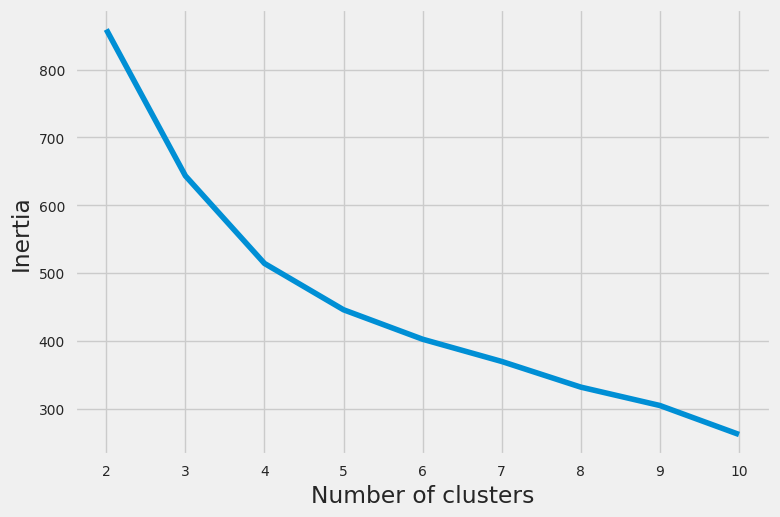

In [ ]:
# Find the number of clusters on df_pca
inertia = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_set) # ** is for open the dictionary
    kmeans.fit(df_pca)
    inertia.append(kmeans.inertia_)

plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), inertia )
plt.xticks(range(2, 11))
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.show()

<div style="border-radius:40px; padding: 15px; background-color:#d9ecd0; font-size:100%; text-align:left">
<h1 align="left"><font color=DarkSlateGray>💡ElbowVisualizer: </font></h1>

- The KElbowVisualizer is a Python visualization tool that helps data scientists select the optimal number of clusters for a k-means clustering algorithm. It implements the elbow method by plotting the within-cluster sum of squares (WCSS) as a function of the number of clusters. The elbow point is the point where the rate of decrease of the WCSS starts to slow down. This is the point where adding another cluster does not give much improvement in the clustering.


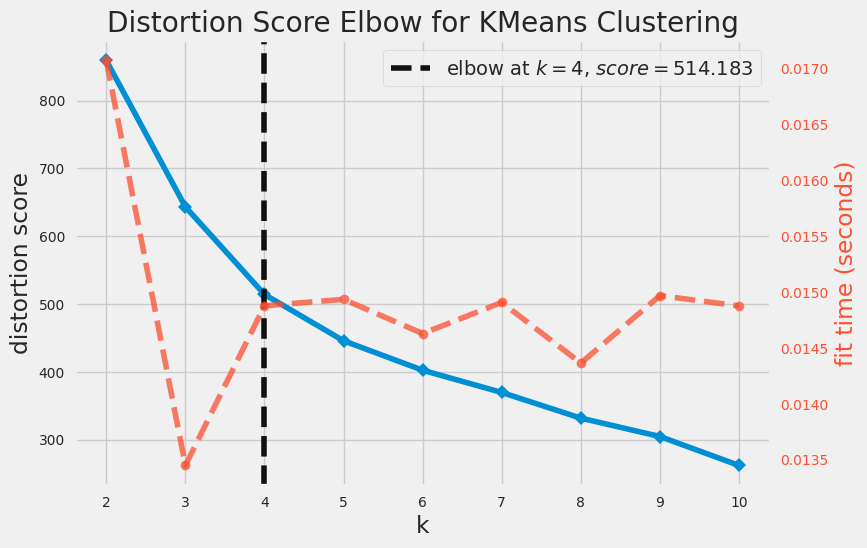

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Elbow Method on df_pca
model_pca_df = KMeans(n_clusters=k, **kmeans_set)
visualizer = KElbowVisualizer(model_pca_df, k=(2, 11), timings=True)
visualizer.fit(df_pca)
visualizer.show()

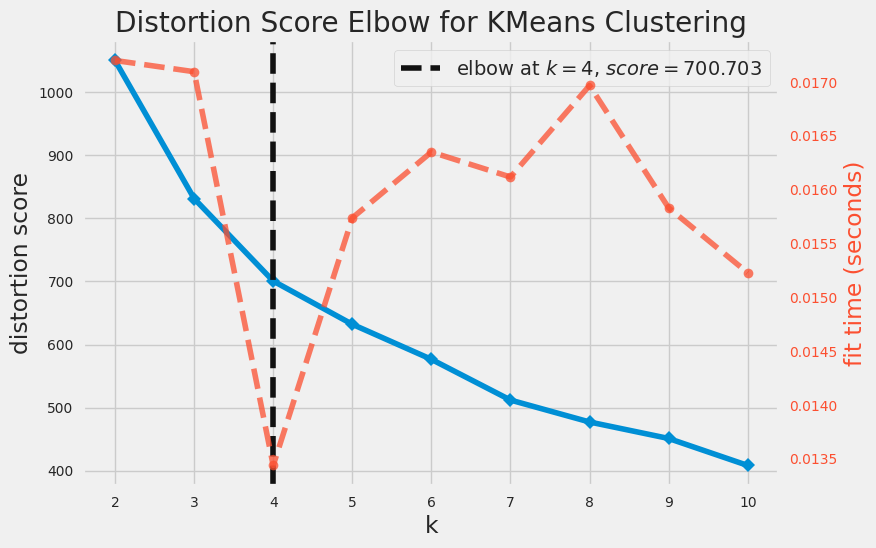

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Elbow Method on scaled data
model_scaled_df = KMeans(n_clusters=k, **kmeans_set)
visualizer = KElbowVisualizer(model_scaled_df, k=(2, 11), timings=True)
visualizer.fit(scaled_df)
visualizer.show()

****

<div style="border-radius:10px; padding: 15px; background-color:GhostWhite; font-size:80%; text-align:left">
<h1 align="left"><font color=royalblue>🔸Observation: </font></h1>
    
- As I can see in both plots(with pca_data, scaled_data) the best nuber of clusters is 4. </div>

****

<div style="border-radius:40px; padding: 15px; background-color:#d9ecd0; font-size:100%; text-align:left">
<h1 align="left"><font color=DarkSlateGray>💡Silhouette coefficient method to find the optimal number of clusters: </font></h1>
    
The silhouette coefficient method is a measure of how well a data point is clustered. It is calculated by measuring the similarity of a data point to its own cluster (the intra-cluster similarity) and the similarity of the data point to the nearest cluster (the inter-cluster similarity).

<span style='color:brown'>**The silhouette coefficient is then calculated as follows:**</span><br>
$ silhouette coefficient = (b - a) / max(a, b)$ <br>
<span style='color:brown'>**where:**</span>
-  a is the intra-cluster similarity<br>
-  b is the inter-cluster similarity<br>

A silhouette coefficient of +1 indicates that the data point is very well-clustered, a value of 0 indicates that the data point is on the boundary between two clusters, and a value of -1 indicates that the data point is mis-clustered.<br>

The silhouette coefficient method is a versatile clustering evaluation metric that can be used with any clustering algorithm. It is particularly useful for evaluating clustering algorithms that are sensitive to outliers, such as DBSCAN.<br>

◾ <span style='color:brown'> **Here are some of the advantages of using the silhouette coefficient method:**</span><br>
- It is a versatile metric that can be used with any clustering algorithm.
- It is not sensitive to outliers.
- It is easy to interpret.

◾ <span style='color:brown'>**Here are some of the disadvantages of using the silhouette coefficient method:**<br>
-  It can be computationally expensive to calculate for large datasets.
-  It can be difficult to compare silhouette coefficients across different datasets.
    
Overall, the silhouette coefficient method is a useful clustering evaluation metric that can be used to assess the quality of clustering results. It is particularly useful for evaluating clustering algorithms that are sensitive to outliers. </div>


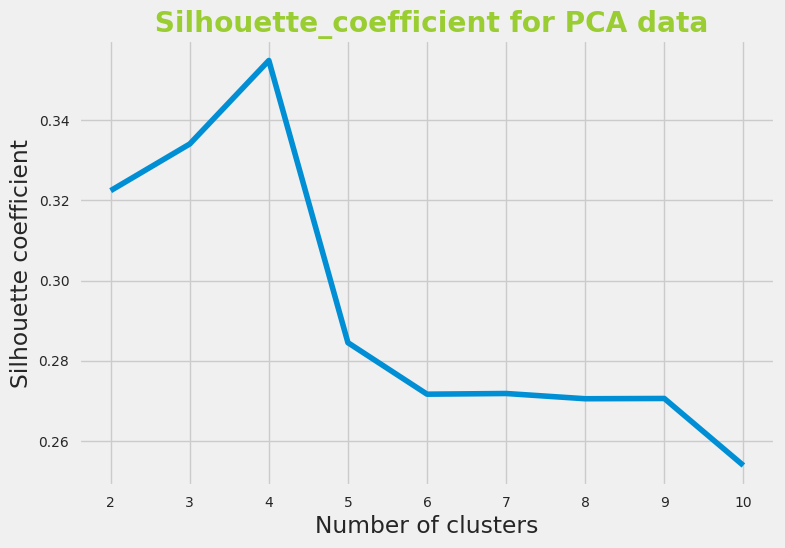

In [ ]:
# Silhouette_coefficient for PCA data
silhouette_coefficient = []
for k in range(2, 11): # start k from 2. one is not good.
    kmeans = KMeans(n_clusters=k, **kmeans_set)
    kmeans.fit(df_pca)
    score = silhouette_score(df_pca, kmeans.labels_)
    silhouette_coefficient.append(score)

plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficient)
plt.xticks(range(2, 11))
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette coefficient")
plt.title(" Silhouette_coefficient for PCA data", color="YellowGreen", fontweight="bold")
plt.show()

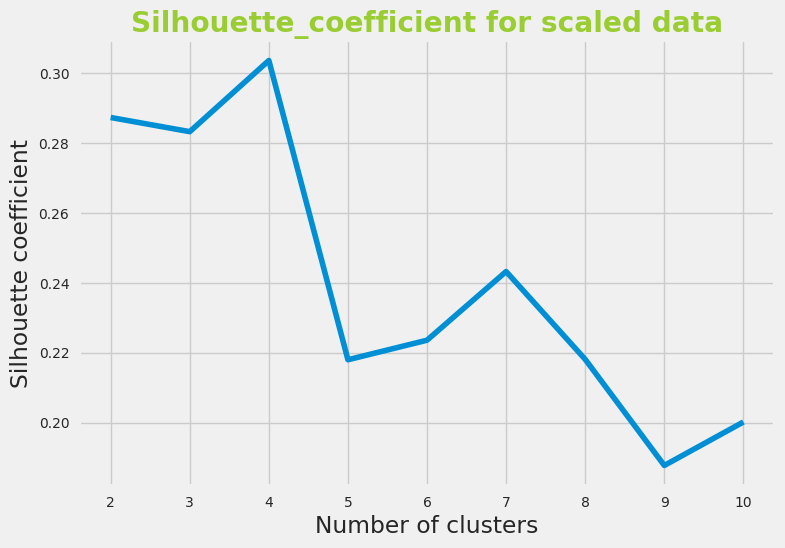

In [ ]:
# Silhouette_coefficient for scaled data
silhouette_coefficient = []
for k in range(2, 11): # start k from 2. one is not good.
    kmeans = KMeans(n_clusters=k, **kmeans_set)
    kmeans.fit(scaled_df)
    score = silhouette_score(scaled_df, kmeans.labels_)
    silhouette_coefficient.append(score)

plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficient)
plt.xticks(range(2, 11))
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette coefficient")
plt.title("Silhouette_coefficient for scaled data", color="YellowGreen", fontweight="bold")
plt.show()

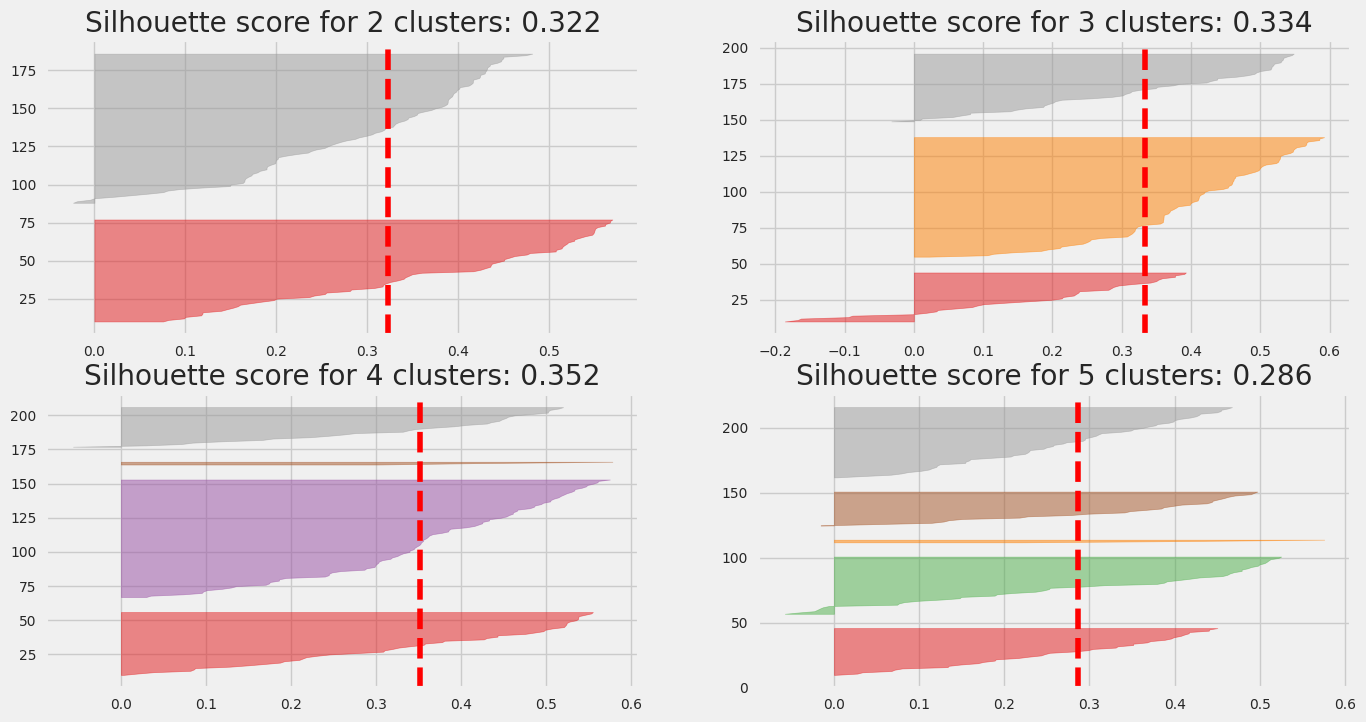

In [ ]:
# Silhouette scores of PCA data
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 8))
ax = [ax1, ax2, ax3, ax4]

for i in range(2, 6):
    kmeans = KMeans(n_clusters=i)
    silho_vis = SilhouetteVisualizer(kmeans, ax=ax[i-2])
    silho_vis.fit(df_pca)
    txt = "Silhouette score for " + str(i) + " clusters: "+ str(round(sil_score(df_pca, kmeans.labels_), 3))
    ax[i-2].set_title(txt)

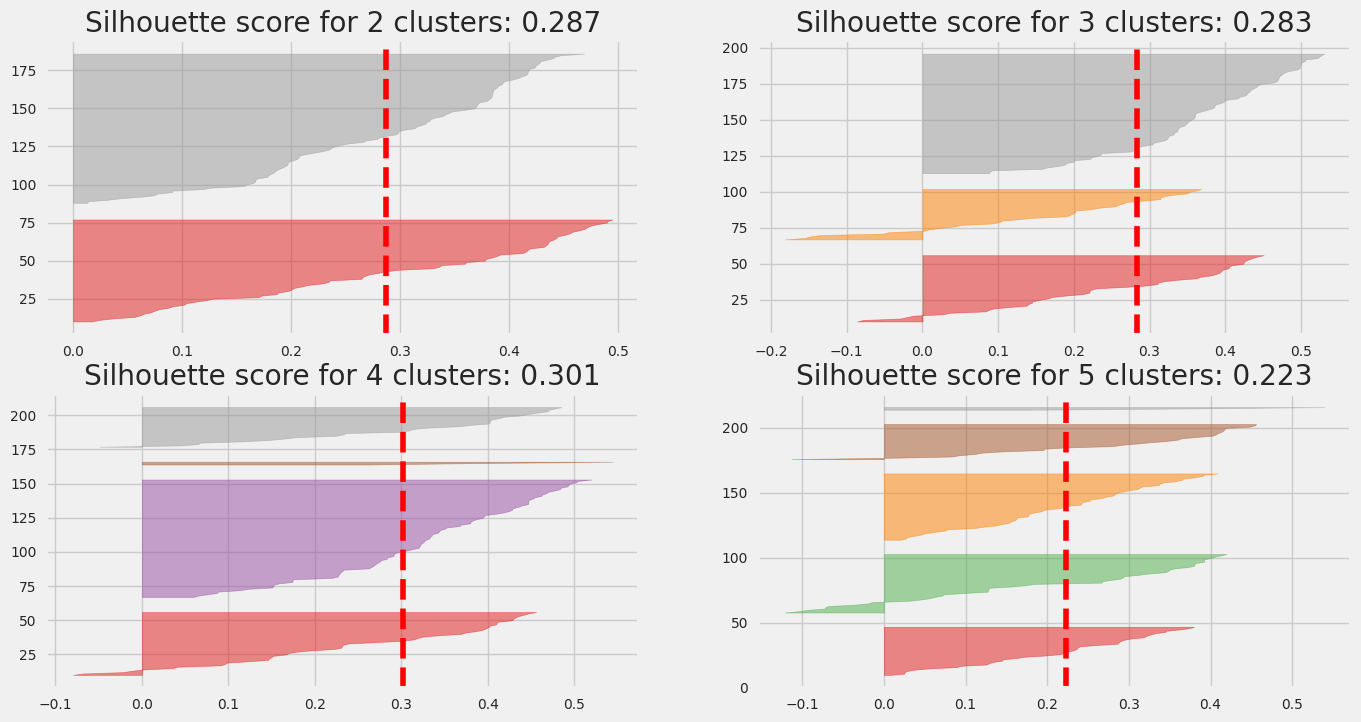

In [ ]:
# Silhouette scores of scaled data
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15,8))
ax = [ax1, ax2, ax3, ax4]

for i in range(2, 6):
    kmeans = KMeans(n_clusters=i)
    silho_vis = SilhouetteVisualizer(kmeans, ax=ax[i-2])
    silho_vis.fit(scaled_df)
    txt = "Silhouette score for " + str(i) + " clusters: "+ str(round(sil_score(scaled_df, kmeans.labels_), 3))
    ax[i-2].set_title(txt)

***

<div style="border-radius:10px; padding: 15px; background-color:GhostWhite; font-size:80%; text-align:left">
<h1 align="left"><font color=royalblue>🔸Observation: </font></h1>
    
- As I can see the the best number of clusters is 4 again
    
***

In [ ]:
# Creat a model with 4 clusters
kmeans = KMeans(n_clusters=4, **kmeans_set)
kmeans.fit(df_pca)
pred_kmeans = kmeans.labels_
centroids = kmeans.cluster_centers_
centroid_df = pd.DataFrame(centroids, columns=df_pca.columns)
centroid_df

PC1       PC2       PC3       PC4
0  5.460225  5.432473  0.211648  0.906058
1 -2.400695  0.429863 -0.119772  0.676417
2  2.608934 -0.881836  0.072803  1.032730
3  0.266593 -0.130548  0.034515 -0.748682

In [ ]:
# Create a copy of the PCA-transformed data with predicted cluster labels
df_pca_copy = df_pca.copy()
df_pca_copy["KMeans_Pred"] = pred_kmeans  # Add a new column containing the predicted cluster labels
df_pca_copy

PC1       PC2       PC3       PC4  KMeans_Pred
0   -2.913025  0.095621 -0.718118  1.005255            1
1    0.429911 -0.588156 -0.333486 -1.161059            3
2   -0.285225 -0.455174  1.221505 -0.868115            3
3   -2.932423  1.695555  1.525044  0.839625            1
4    1.033576  0.136659 -0.225721 -0.847063            3
..        ...       ...       ...       ...          ...
162 -0.820631  0.639570 -0.389923 -0.706595            3
163 -0.551036 -1.233886  3.101350 -0.115311            3
164  0.498524  1.390744 -0.238526 -1.074098            3
165 -1.887451 -0.109453  1.109752  0.056257            1
166 -2.864064  0.485998  0.223167  0.816364            1

[167 rows x 5 columns]

In [ ]:
df_pca_count = pd.DataFrame({"Cluster":df_pca_copy["KMeans_Pred"].value_counts().index,
                             "Count":df_pca_copy["KMeans_Pred"].value_counts().values})

plt = px.pie(df_pca_count, values="Count", names="Cluster", title="Percent of each clusters in dataset",
             color_discrete_sequence=px.colors.sequential.Plasma)
plt.show()

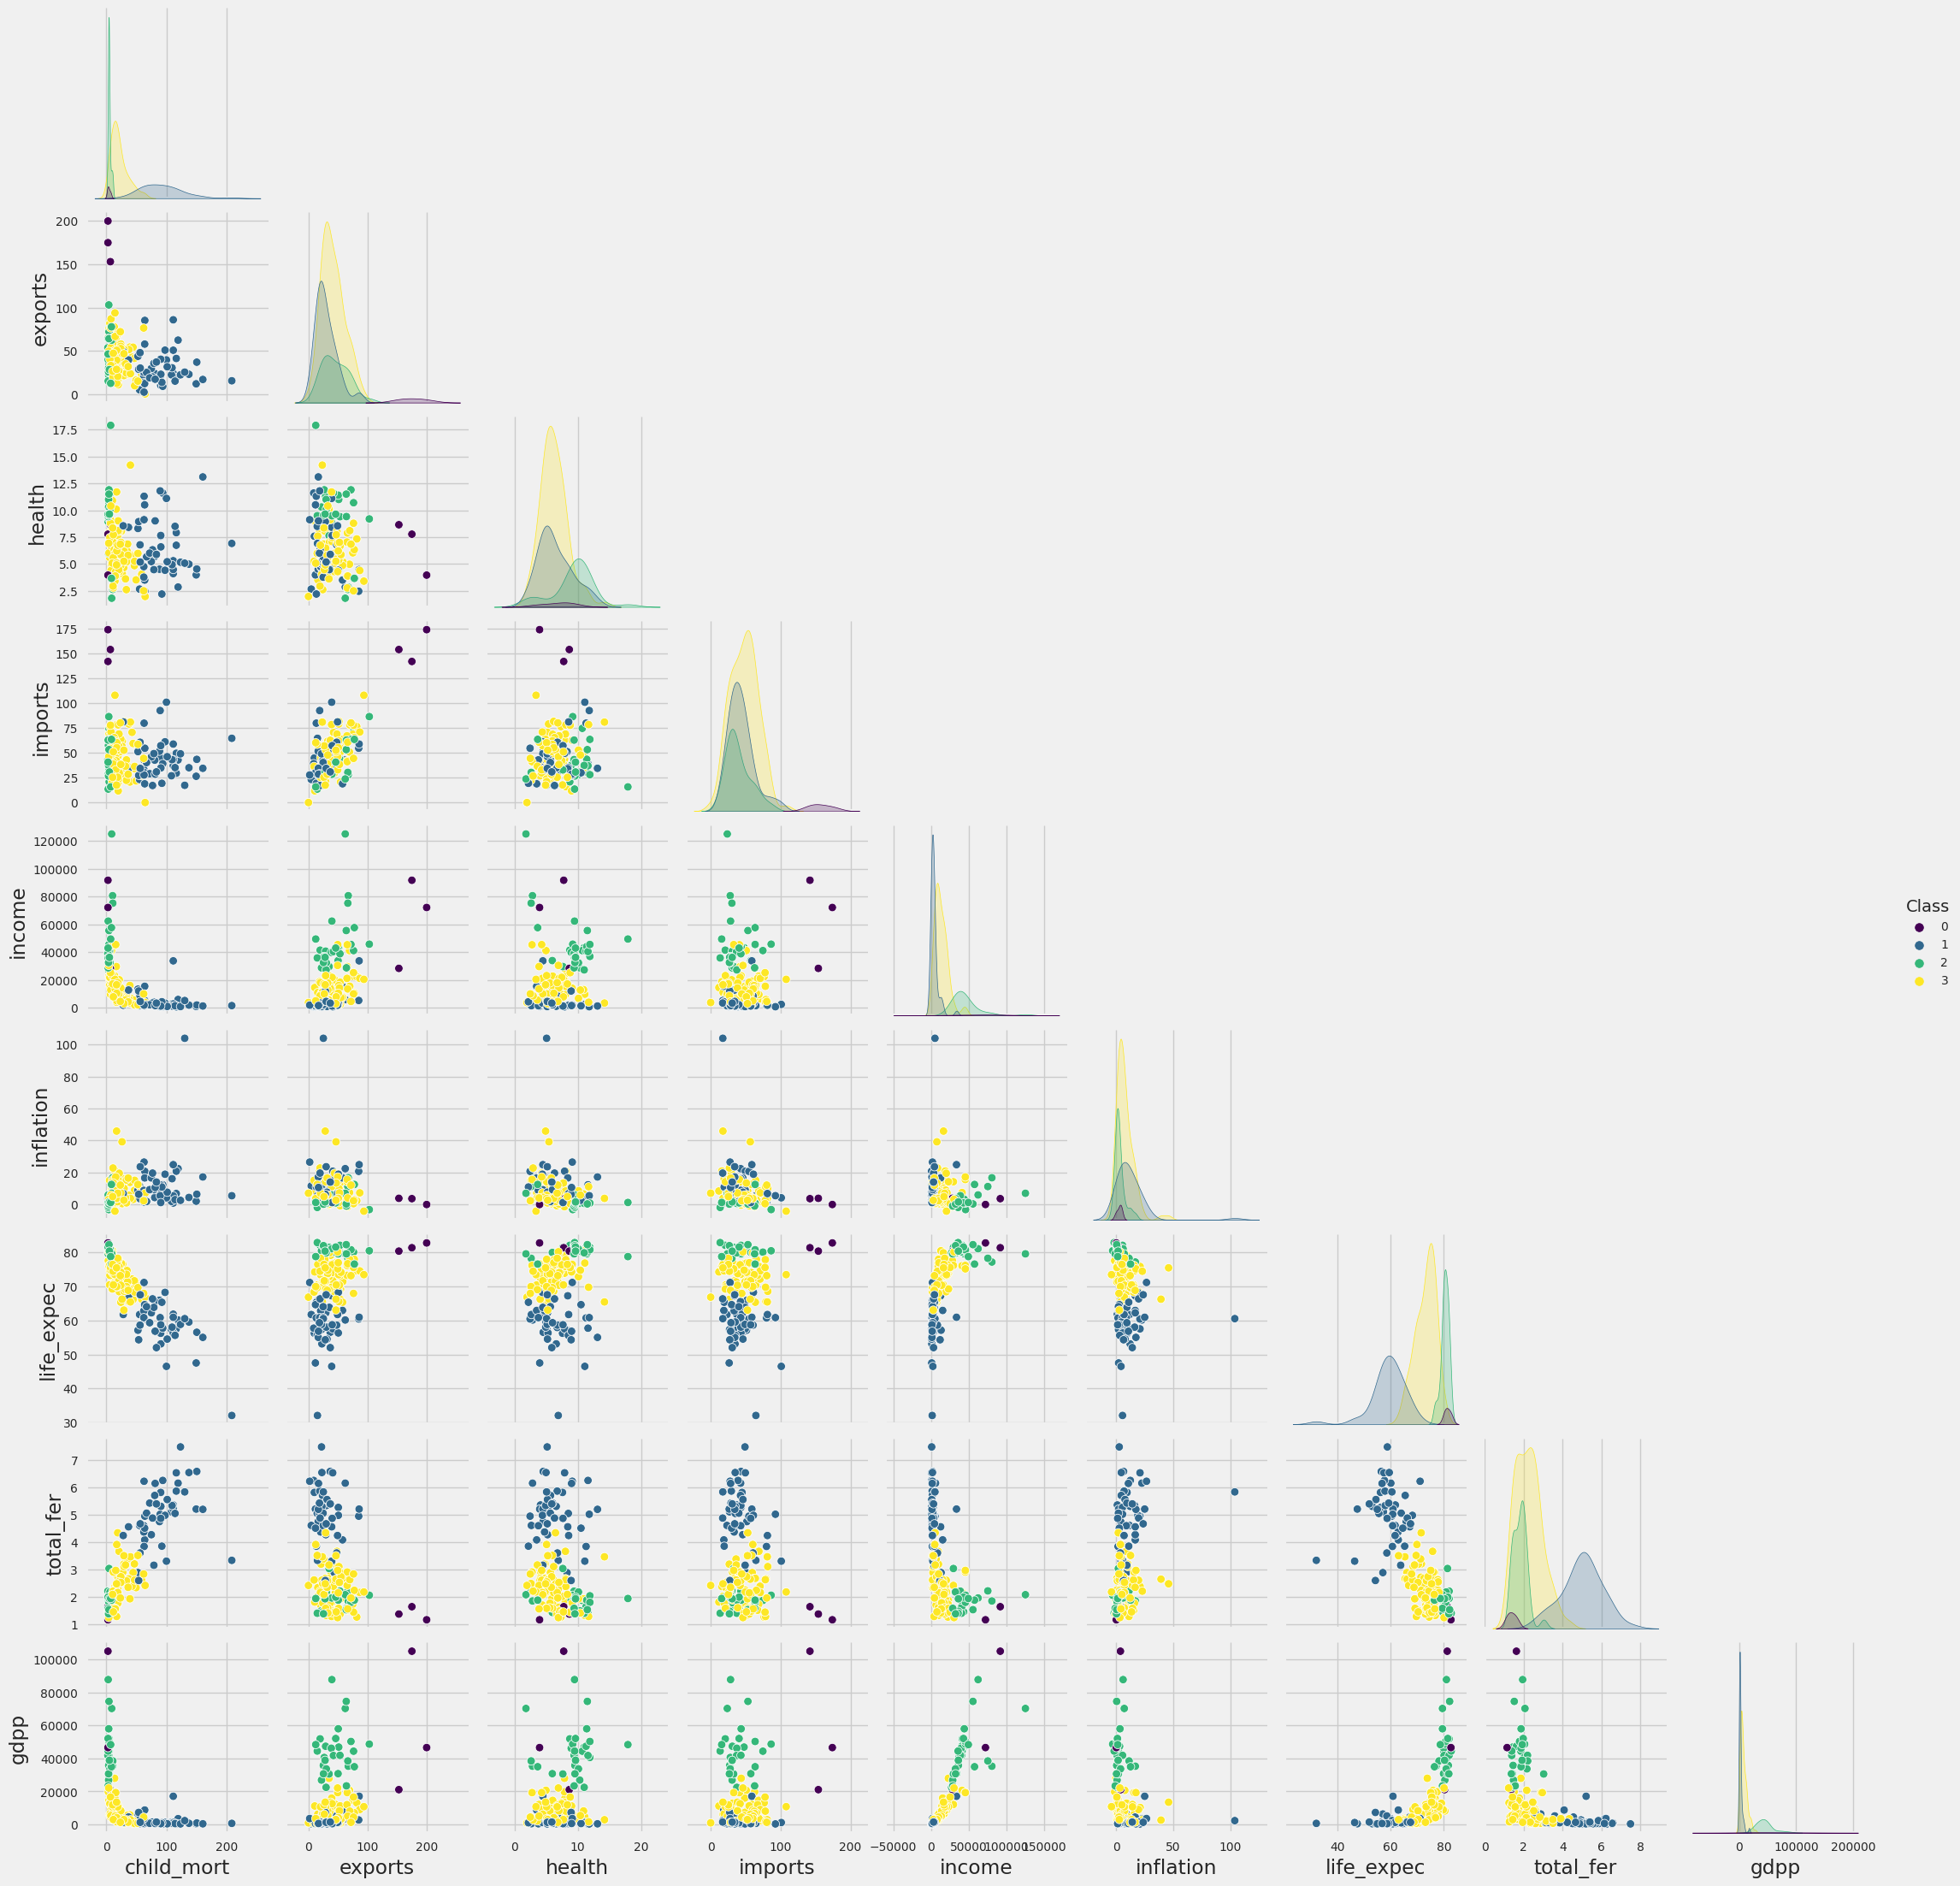

In [ ]:
kmeans_data = df1.copy()
kmeans_data["Class"] = pred_kmeans
sns.pairplot(kmeans_data, hue="Class", corner=True, palette="viridis")

In [ ]:
kmeans_data

child_mort  exports  health  imports  income  inflation  life_expec  \
0          90.2     10.0    7.58     44.9    1610       9.44        56.2   
1          16.6     28.0    6.55     48.6    9930       4.49        76.3   
2          27.3     38.4    4.17     31.4   12900      16.10        76.5   
3         119.0     62.3    2.85     42.9    5900      22.40        60.1   
4          10.3     45.5    6.03     58.9   19100       1.44        76.8   
..          ...      ...     ...      ...     ...        ...         ...   
162        29.2     46.6    5.25     52.7    2950       2.62        63.0   
163        17.1     28.5    4.91     17.6   16500      45.90        75.4   
164        23.3     72.0    6.84     80.2    4490      12.10        73.1   
165        56.3     30.0    5.18     34.4    4480      23.60        67.5   
166        83.1     37.0    5.89     30.9    3280      14.00        52.0   

     total_fer   gdpp  Class  
0         5.82    553      1  
1         1.65   4090      3  
2         2.89   4460      3  
3         6.16   3530      1  
4         2.13  12200      3  
..         ...    ...    ...  
162       3.50   2970      3  
163       2.47  13500      3  
164       1.95   1310      3  
165       4.67   1310      1  
166       5.40   1460      1  

[167 rows x 10 columns]

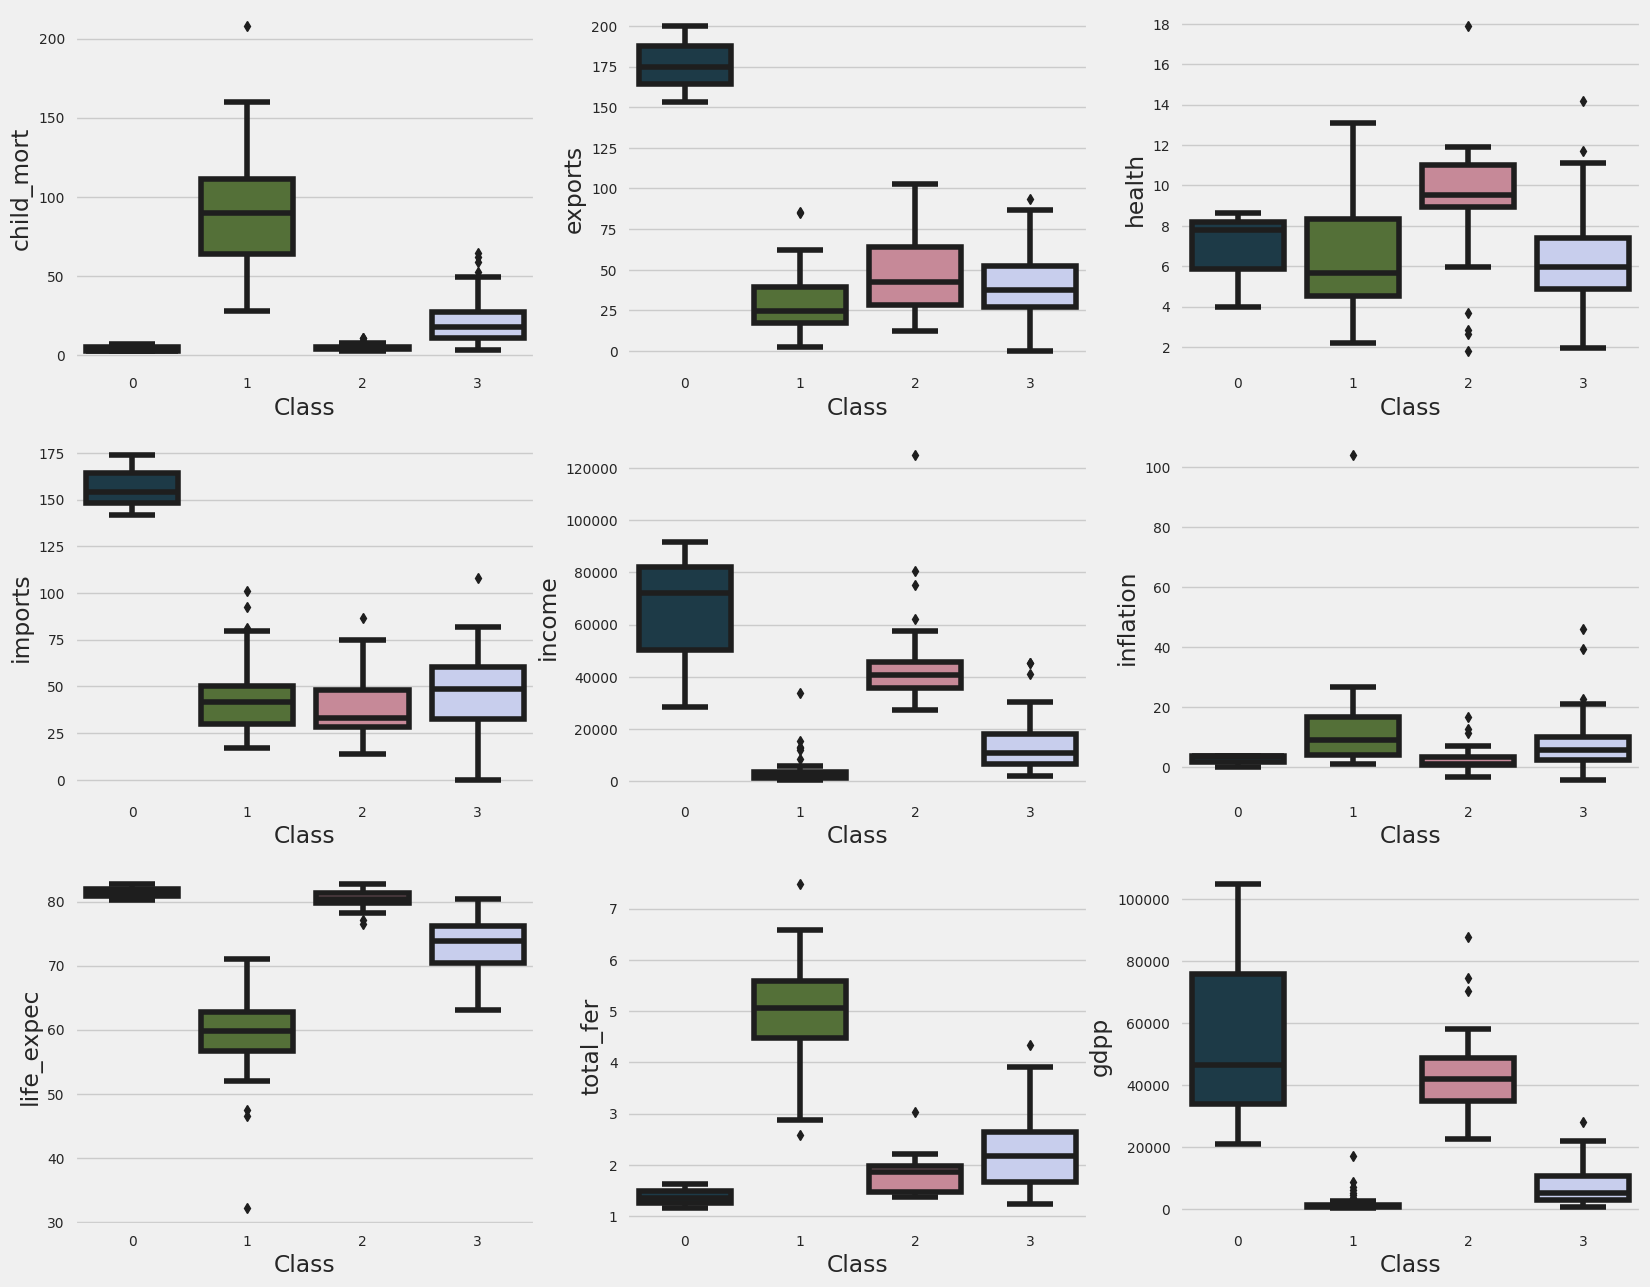

In [ ]:
import matplotlib.pyplot as plt
fig, (ax1, ax2, ax3) = plt.subplots(3, 3, figsize=(18, 15))
ax = [ax1, ax2, ax3]
j, k = 0, 0
for i in kmeans_data.drop(columns="Class").columns:
    sns.boxplot(x="Class", y=i, data=kmeans_data, ax=ax[j][k], palette="cubehelix")
    if divmod(k,2) == (1, 0):
        j += 1
        k = 0
    else: k += 1
plt.show()

In [ ]:
print(kmeans_data.Class.value_counts())
kmeans_data.groupby("Class").mean()

Class
3    87
1    48
2    29
0     3
Name: count, dtype: int64


child_mort     exports    health     imports        income  inflation  \
Class                                                                          
0        4.133333  176.000000  6.793333  156.666667  64033.333333   2.468000   
1       91.610417   29.571042  6.433542   43.133333   3897.354167  11.911146   
2        4.982759   45.703448  9.245862   39.513793  45762.068966   2.727793   
3       21.113793   41.291828  6.217241   47.636390  13297.586207   7.371506   

       life_expec  total_fer          gdpp  
Class                                       
0       81.433333   1.380000  57566.666667  
1       59.239583   4.992083   1909.208333  
2       80.386207   1.814828  44065.517241  
3       73.147126   2.251954   7158.298851

***
<div style="border-radius:10px; padding: 15px; background-color:GhostWhite; font-size:90%; text-align:left">
<h1 align="left"><font color=royalblue>🔸Observation: </font></h1>

▪️ Class 0 with 3 countries has a lowest child_mort and total_fer. On the other hand these countries have a lowest inflations. Also these countries have a highest income and gdpp in compare of other coutries. As we can see life_expec in these countries is high. Also situation of health in these countries is good.So these countries don't need help and should have *least priority* in the list of countries requiring aid.

▪️ Class 1 with 48 countries has a high child_mort(91.61) in compare of other classes. Also these countries in this class have highest inflation than other classes.On the other hand the lowest amount of gdpp belongs to this class.Considering this, it can be said that the countries that are in class 1 are the most needy countries and need the most help, so they should be in the *1th priority*.

▪️ Class 2 with  29 countries : It has 2th lowest child mortality rate, 2th highest gdpp and income. Also its inflation is 2nd lowest.  This group has developed countries. These countries do not need help and can be *3th priority* in the list of countries requiring aid.

▪️ Class 3 with 87 countries :It has 2th highest child_mort rate in compare of other. Also it has 2th highest inflation rate. On the other hand these countries have 2th lowest income and gdpp rate.These countries might need help and should be *2th priority* in the list of countries requiring aid.
***

In [ ]:
priority = kmeans_data.Class.value_counts()
kmeans_data.Class[kmeans_data.Class==priority.index[0]]=44  #  Don't need help
kmeans_data.Class[kmeans_data.Class==priority.index[1]]=11  #  Need help
kmeans_data.Class[kmeans_data.Class==priority.index[2]]=33  #  Don't need immediate help
kmeans_data.Class[kmeans_data.Class==priority.index[3]]=22 #  Maybe need help

kmeans_data.Class.replace({11:1,22:2, 33:3, 44:4}, inplace=True)
kmeans_data.rename(columns={"Class": "Priority"}, inplace=True)
kmeans_data.Priority.value_counts()

Priority
4    87
1    48
3    29
2     3
Name: count, dtype: int64

In [ ]:
category = {1:"Undeveloped", 2:"Developing", 3:"Developed", 4:"Well_developed"}
kmeans_data["country"] = df["country"]
kmeans_data.Priority.replace(category, inplace=True)

In [ ]:
px.choropleth(data_frame=kmeans_data, locationmode="country names", locations="country",
              color=kmeans_data["Priority"], title="Countries by category that need help",
              color_discrete_map={"Undeveloped":"#a1c9f4", "Developing":"#8de5a1",
                                  "Developed":"#ff9f9b", "Well developed":"#d0bbff"},
              projection="equirectangular")

In [ ]:
px.choropleth(data_frame=kmeans_data, locationmode="country names", locations="country",
             color = kmeans_data.Priority, title="Countries in African continent",
             color_discrete_map={"Undeveloped":"#a1c9f4", "Developing":"#8de5a1",
                                  "Developed":"#ff9f9b", "Well developed":"#d0bbff"},
             projection="orthographic", scope="africa")

In [ ]:
px.choropleth(data_frame=kmeans_data, locationmode="country names", locations="country",
             color=kmeans_data.Priority, title="Countries in Asia continent",
             color_discrete_map={"Undeveloped":"#a1c9f4", "Developing":"#8de5a1",
                                  "Developed":"#ff9f9b", "Well developed":"#d0bbff"},
             scope="asia")

In [ ]:
df["Class"] = kmeans_data.Priority
count_need_help = df[df.Class == "Undeveloped"]
count_need_help.country

0                   Afghanistan
3                        Angola
17                        Benin
21                     Botswana
25                 Burkina Faso
26                      Burundi
28                     Cameroon
31     Central African Republic
32                         Chad
36                      Comoros
37             Congo, Dem. Rep.
38                  Congo, Rep.
40                Cote d'Ivoire
49            Equatorial Guinea
50                      Eritrea
55                        Gabon
56                       Gambia
59                        Ghana
63                       Guinea
64                Guinea-Bissau
66                        Haiti
72                         Iraq
80                        Kenya
81                     Kiribati
84                          Lao
87                      Lesotho
88                      Liberia
93                   Madagascar
94                       Malawi
97                         Mali
99                   Mauritania
106     

In [ ]:
fig = px.bar(count_need_help, x="child_mort", y="country", orientation="h")
fig.show()

In [ ]:
fig = px.bar(count_need_help, x="gdpp", y="country", orientation="h")
fig.show()

In [ ]:
fig = px.bar(count_need_help, x="inflation", y="country", orientation="h")
fig.show()

In [ ]:
fig = px.bar(count_need_help, x="life_expec", y="country", orientation="h")
fig.show()

In [ ]:
for i in count_need_help.drop(columns=["country", "Class"]).columns:
    fig = px.choropleth(data_frame=count_need_help, locationmode="country names",
           locations="country",projection="orthographic", height=600, color=i, title=f"{i} rate by countries")
    fig.show()